In [1]:
import mne, fooof, numpy as np, pandas as pd, os, glob, sys
from IPython.display import display, Markdown
from tqdm import tqdm, trange
import matplotlib.pyplot as plt

In [10]:
pip install matplotlib

  Using cached matplotlib-3.3.4-cp36-cp36m-manylinux1_x86_64.whl (11.5 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached Pillow-8.4.0-cp36-cp36m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)
  Using cached kiwisolver-1.3.1-cp36-cp36m-manylinux1_x86_64.whl (1.1 MB)
Note: you may need to restart the kernel to use updated packages.


In [7]:
mne.channels.get_builtin_montages()

['EGI_256',
 'GSN-HydroCel-128',
 'GSN-HydroCel-129',
 'GSN-HydroCel-256',
 'GSN-HydroCel-257',
 'GSN-HydroCel-32',
 'GSN-HydroCel-64_1.0',
 'GSN-HydroCel-65_1.0',
 'biosemi128',
 'biosemi16',
 'biosemi160',
 'biosemi256',
 'biosemi32',
 'biosemi64',
 'easycap-M1',
 'easycap-M10',
 'mgh60',
 'mgh70',
 'standard_1005',
 'standard_1020',
 'standard_alphabetic',
 'standard_postfixed',
 'standard_prefixed',
 'standard_primed',
 'artinis-octamon',
 'artinis-brite23']

In [8]:
# projpath="/home/tmorshed/projects/def-johngrif/tmorshed/"
projpath="/nethome/kcni/moveisi/lab/repos/bme1500/po_scratch/data/bme1500_eeg_data"

In [9]:
datapath=os.path.join(projpath, 'data', 'nmod')
gitpath=os.path.join(projpath, 'bme1500')
if os.path.exists(datapath) and os.path.exists(gitpath):
    display(Markdown("success"))
else:
    display(Markdown('fix it'))

fix it

In [10]:
datapath = "/nethome/kcni/moveisi/lab/repos/bme1500/po_scratch/data/bme1500_eeg_data"

In [11]:
os.chdir(datapath)

In [49]:
def md(input):
    display(Markdown(input))
    
## DATA LOARDERS:

def finder():
    filesDepth5 = glob.glob('*/*/*/*/*')
    dirsDepth5 = filter(lambda f: os.path.isdir(f), filesDepth5)

    markers=np.sort(np.array([os.path.join(datapath, f) for f in filesDepth5 if f.endswith('.pkl')]))
    npzs=np.sort(np.array([os.path.join(datapath, f) for f in filesDepth5 if f.endswith('.npz')]))
    return markers, npzs

def load_to_df(markers, npzs, sno):
    _marker=pd.read_pickle(markers[sno])
    fs=_marker['fs']
    dt=1/fs


    with open(npzs[sno], 'rb') as f:
        _npz=np.load(f)
        _data=_npz.f.arr_0
        f.close()
    _df_data=pd.DataFrame(_data,
                          index=_marker['chNames'])
    _df_data.columns=_df_data.columns*dt

    a=pd.DataFrame(np.zeros((np.shape(_data)[-1]), dtype=str))
    a.index=a.index*dt

    _dfidx = pd.DataFrame([i['type'] for i in _marker['mrk']], index=[i['idx']*dt for i in _marker['mrk']])
    _dfidx=_dfidx.drop(labels=_dfidx.index[0])

    for i in _dfidx.index:
        a.loc[i]=_dfidx.loc[i]

    intdict={"":0,
            "s":1,
            "x":2,
            "na":3}

    for x in intdict:
        a=a.replace(x, int(intdict[x]))
    a=a.T
    a.index=['stim']

    _df_data=pd.concat([_df_data, a])
    _df_data.columns.names=['t']
    _df_data.index.names=['ch']
    return _marker, _df_data

def df_to_mne(_marker, _df_data):
    info = mne.create_info(ch_names=list(_df_data.index), sfreq=_marker['fs'], ch_types=(['eeg']*64)+(['misc']*7)+['stim'])
    info['subject_info']={"id":_marker['patientId']}
    raw=mne.io.RawArray(_df_data,info)
    #m = mne.channels.make_standard_montage('standard_1020')
    #raw.set_montage('standard_1020')
    return raw

In [108]:
markers[180]

'/nethome/kcni/moveisi/lab/repos/bme1500/po_scratch/data/bme1500_eeg_data/20/raw/D1/left_r/run_33_hdr.pkl'

In [119]:
info = mne.create_info(ch_names=list(_df_data.index), sfreq=_marker['fs'], ch_types=(['eeg']*64)+(['misc']*7)+['stim'])

ValueError: ch_types and ch_names must be the same length (72 != 70) for ch_types=['eeg' 'eeg' 'eeg' 'eeg' 'eeg' 'eeg' 'eeg' 'eeg' 'eeg' 'eeg' 'eeg' 'eeg'
 'eeg' 'eeg' 'eeg' 'eeg' 'eeg' 'eeg' 'eeg' 'eeg' 'eeg' 'eeg' 'eeg' 'eeg'
 'eeg' 'eeg' 'eeg' 'eeg' 'eeg' 'eeg' 'eeg' 'eeg' 'eeg' 'eeg' 'eeg' 'eeg'
 'eeg' 'eeg' 'eeg' 'eeg' 'eeg' 'eeg' 'eeg' 'eeg' 'eeg' 'eeg' 'eeg' 'eeg'
 'eeg' 'eeg' 'eeg' 'eeg' 'eeg' 'eeg' 'eeg' 'eeg' 'eeg' 'eeg' 'eeg' 'eeg'
 'eeg' 'eeg' 'eeg' 'eeg' 'misc' 'misc' 'misc' 'misc' 'misc' 'misc' 'misc'
 'stim']

In [120]:
markers, npzs = finder()
_marker, _df_data=load_to_df(markers, npzs, 147)

In [110]:
_marker=pd.read_pickle(markers[147])
fs=_marker['fs']
dt=1/fs

In [111]:
_marker

{'fs': 5000.0,
 'patientId': 20,
 'clinScore': 3,
 'chNames': ['Fp1',
  'Fp2',
  'F7',
  'F3',
  'Fz',
  'F4',
  'F8',
  'FC5',
  'FC1',
  'FC2',
  'FC6',
  'T7',
  'C3',
  'Cz',
  'C4',
  'T8',
  'TP9',
  'CP5',
  'CP1',
  'CP2',
  'CP6',
  'TP10',
  'P7',
  'P3',
  'Pz',
  'P4',
  'P8',
  'PO9',
  'O1',
  'Oz',
  'O2',
  'PO10',
  'AF7',
  'AF3',
  'AF4',
  'AF8',
  'F5',
  'F1',
  'F2',
  'F6',
  'FT9',
  'FT7',
  'FC3',
  'FC4',
  'FT8',
  'FT10',
  'C5',
  'C1',
  'C2',
  'C6',
  'TP7',
  'CP3',
  'CPz',
  'CP4',
  'TP8',
  'P5',
  'P1',
  'P2',
  'P6',
  'PO7',
  'PO3',
  'POz',
  'PO4',
  'PO8',
  'LB',
  'LT',
  'RB',
  'RT',
  'STI 014'],
 'stimInt': 0,
 'stimCont': 3,
 'stimType': 'ring',
 'hemisphere': 'L',
 'mrk': [{'type': '', 'idx': 1},
  {'type': 's', 'idx': 144401},
  {'type': 'x', 'idx': 154401},
  {'type': 'x', 'idx': 164401},
  {'type': 'x', 'idx': 174401},
  {'type': 'x', 'idx': 184201},
  {'type': 'x', 'idx': 194201},
  {'type': 'x', 'idx': 204201},
  {'type': 'x',

In [15]:
marker_sids=pd.DataFrame([i.split("/")[-5] for i in markers], columns=['sid'])

In [16]:
npz_sids=pd.DataFrame([i.split("/")[-5] for i in npzs], columns=['sid'])

In [17]:
fs=marker_sids.join(pd.DataFrame(markers, columns=['csvs'])).join(pd.DataFrame(npzs, columns=['npzs']).join(pd.DataFrame([i.split("/")[-1].split('_')[1] for i in markers], columns=['sess']))).set_index(['sid', 'sess']).sort_index()

In [18]:
fs

csvs  \
sid sess                                                      
0   00    /nethome/kcni/moveisi/lab/repos/bme1500/po_scr...   
    01    /nethome/kcni/moveisi/lab/repos/bme1500/po_scr...   
    02    /nethome/kcni/moveisi/lab/repos/bme1500/po_scr...   
    03    /nethome/kcni/moveisi/lab/repos/bme1500/po_scr...   
    04    /nethome/kcni/moveisi/lab/repos/bme1500/po_scr...   
...                                                     ...   
6   29    /nethome/kcni/moveisi/lab/repos/bme1500/po_scr...   
    30    /nethome/kcni/moveisi/lab/repos/bme1500/po_scr...   
    31    /nethome/kcni/moveisi/lab/repos/bme1500/po_scr...   
    32    /nethome/kcni/moveisi/lab/repos/bme1500/po_scr...   
    33    /nethome/kcni/moveisi/lab/repos/bme1500/po_scr...   

                                                       npzs  
sid sess                                                     
0   00    /nethome/kcni/moveisi/lab/repos/bme1500/po_scr...  
    01    /nethome/kcni/moveisi/lab/repos/bme1500/po_scr...  
    02    /nethome/kcni/moveisi/lab/repos/bme1500/po_scr...  
    03    /nethome/kcni/moveisi/lab/repos/bme1500/po_scr...  
    04    /nethome/kcni/moveisi/lab/repos/bme1500/po_scr...  
...                                                     ...  
6   29    /nethome/kcni/moveisi/lab/repos/bme1500/po_scr...  
    30    /nethome/kcni/moveisi/lab/repos/bme1500/po_scr...  
    31    /nethome/kcni/moveisi/lab/repos/bme1500/po_scr...  
    32    /nethome/kcni/moveisi/lab/repos/bme1500/po_scr...  
    33    /nethome/kcni/moveisi/lab/repos/bme1500/po_scr...  

[502 rows x 2 columns]

In [19]:
a = pd.DataFrame([int(fs.index[i][0]) for i in range(len(fs))], columns=['sids'])

In [20]:
len(np.unique(a))

16

In [21]:
b = pd.DataFrame([fs.index[i][1] for i in range(len(fs))], columns=['n_trials'])

In [22]:
c = a.join(b).set_index(['sids']).sort_index()

In [23]:
n_trials=[int(c.loc[i].max()[0]) for i in c.index.unique()]

In [66]:
b

n_trials
0         00
1         01
2         02
3         03
4         04
..       ...
497       29
498       30
499       31
500       32
501       33

[502 rows x 1 columns]

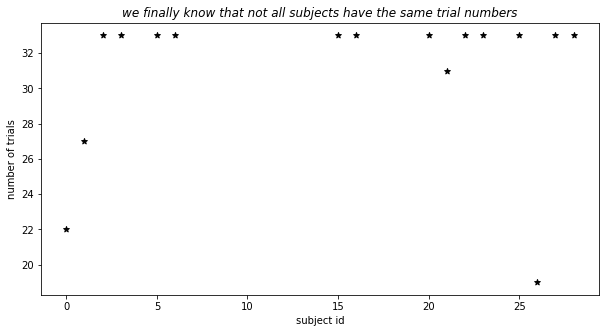

In [24]:
plt.figure(figsize=(10, 5))
plt.scatter(x=c.index.unique(), y=n_trials, c='k', marker='*')
plt.xlabel('subject id')
plt.ylabel('number of trials')
plt.yticks=np.sort(np.unique(n_trials))
plt.title('we finally know that not all subjects have the same trial numbers', fontstyle='oblique')
plt.show()

In [19]:
ls $datapath -l | wc -l

18


In [20]:
b

n_trials
0         00
1         01
2         02
3         03
4         04
..       ...
497       29
498       30
499       31
500       32
501       33

[502 rows x 1 columns]

Plotting stimulations:

In [49]:
[_marker['stimInt']]

[0]

In [65]:
npzs

array(['/nethome/kcni/moveisi/lab/repos/bme1500/po_scratch/data/bme1500_eeg_data/0/raw/D1/left_r/run_00_data.npy.npz',
       '/nethome/kcni/moveisi/lab/repos/bme1500/po_scratch/data/bme1500_eeg_data/0/raw/D1/left_r/run_01_data.npy.npz',
       '/nethome/kcni/moveisi/lab/repos/bme1500/po_scratch/data/bme1500_eeg_data/0/raw/D1/left_r/run_02_data.npy.npz',
       '/nethome/kcni/moveisi/lab/repos/bme1500/po_scratch/data/bme1500_eeg_data/0/raw/D1/left_r/run_03_data.npy.npz',
       '/nethome/kcni/moveisi/lab/repos/bme1500/po_scratch/data/bme1500_eeg_data/0/raw/D1/left_r/run_04_data.npy.npz',
       '/nethome/kcni/moveisi/lab/repos/bme1500/po_scratch/data/bme1500_eeg_data/0/raw/D1/left_r/run_05_data.npy.npz',
       '/nethome/kcni/moveisi/lab/repos/bme1500/po_scratch/data/bme1500_eeg_data/0/raw/D1/left_r/run_06_data.npy.npz',
       '/nethome/kcni/moveisi/lab/repos/bme1500/po_scratch/data/bme1500_eeg_data/0/raw/D1/left_r/run_07_data.npy.npz',
       '/nethome/kcni/moveisi/lab/repos/bme1500/

TypeError: 'numpy.ndarray' object is not callable

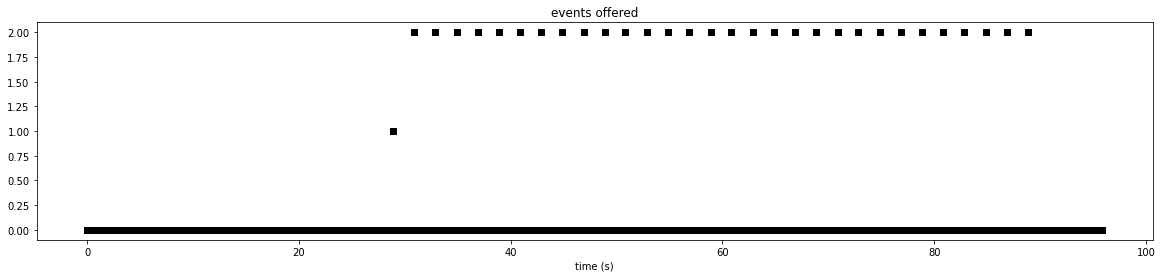

In [50]:
b=np.array(_df_data.iloc[-1,:])
fig,ax=plt.subplots(figsize=(20,4))
plt.scatter(x=load_to_df(markers,npzs, 15)[1].columns,y=b, color="k", marker="s")
plt.xlabel('time (s)')
plt.title('events offered')
plt.yticks(np.unique(b))
plt.ylabel('events type')
display(pd.DataFrame(["", "s", "x", "na"]).T)
plt.show()

In [45]:
_marker.keys()

dict_keys(['fs', 'patientId', 'clinScore', 'chNames', 'stimInt', 'stimCont', 'stimType', 'hemisphere', 'mrk'])

In [46]:
_df_data.head()

t     0.0000    0.0002    0.0004    0.0006    0.0008    0.0010    0.0012   \
ch                                                                          
Fp1  0.000187  0.000187  0.000186  0.000184  0.000183  0.000183  0.000183   
Fp2 -0.000053 -0.000050 -0.000050 -0.000051 -0.000051 -0.000052 -0.000052   
F7  -0.000001 -0.000002 -0.000003 -0.000004 -0.000004 -0.000005 -0.000006   
F3   0.000018  0.000018  0.000015  0.000014  0.000014  0.000015  0.000014   
Fz  -0.000053 -0.000054 -0.000057 -0.000061 -0.000061 -0.000060 -0.000060   

t     0.0014    0.0016    0.0018   ...   95.8380   95.8382   95.8384  \
ch                                 ...                                 
Fp1  0.000183  0.000182  0.000183  ...  0.000014  0.000012  0.000010   
Fp2 -0.000051 -0.000051 -0.000052  ... -0.000023 -0.000025 -0.000026   
F7  -0.000006 -0.000005 -0.000004  ...  0.000005  0.000004  0.000005   
F3   0.000014  0.000015  0.000016  ...  0.000021  0.000019  0.000019   
Fz  -0.000060 -0.000060 -0.000059  ... -0.000018 -0.000020 -0.000019   

t     95.8386   95.8388   95.8390   95.8392   95.8394   95.8396   95.8398  
ch                                                                         
Fp1  0.000011  0.000011  0.000011  0.000011  0.000018  0.000045  0.000053  
Fp2 -0.000025 -0.000025 -0.000026 -0.000026 -0.000015  0.000025  0.000033  
F7   0.000006  0.000005  0.000003  0.000002  0.000021  0.000088  0.000086  
F3   0.000019  0.000020  0.000021  0.000022  0.000024  0.000033  0.000036  
Fz  -0.000018 -0.000017 -0.000017 -0.000016 -0.000005  0.000031  0.000017  

[5 rows x 479200 columns]

In [47]:
_df_data

t       0.0000    0.0002    0.0004    0.0006        0.0008    0.0010   \
ch                                                                      
Fp1    0.000187  0.000187  0.000186  0.000184  1.830000e-04  0.000183   
Fp2   -0.000053 -0.000050 -0.000050 -0.000051 -5.120000e-05 -0.000052   
F7    -0.000001 -0.000002 -0.000003 -0.000004 -4.300000e-06 -0.000005   
F3     0.000018  0.000018  0.000015  0.000014  1.430000e-05  0.000015   
Fz    -0.000053 -0.000054 -0.000057 -0.000061 -6.070000e-05 -0.000060   
...         ...       ...       ...       ...           ...       ...   
RB1    0.000055  0.000054  0.000052  0.000052  5.460000e-05  0.000056   
RB2    0.000031  0.000031  0.000033  0.000034  3.540000e-05  0.000036   
RT     0.000011  0.000009  0.000007  0.000005  5.000000e-07 -0.000009   
Gonio  0.001560  0.001540  0.001550  0.001540  1.540000e-03  0.001530   
stim   0.000000  0.000000  0.000000  0.000000  0.000000e+00  0.000000   

t       0.0012    0.0014    0.0016    0.0018   ...   95.8380   95.8382  \
ch                                             ...                       
Fp1    0.000183  0.000183  0.000182  0.000183  ...  0.000014  0.000012   
Fp2   -0.000052 -0.000051 -0.000051 -0.000052  ... -0.000023 -0.000025   
F7    -0.000006 -0.000006 -0.000005 -0.000004  ...  0.000005  0.000004   
F3     0.000014  0.000014  0.000015  0.000016  ...  0.000021  0.000019   
Fz    -0.000060 -0.000060 -0.000060 -0.000059  ... -0.000018 -0.000020   
...         ...       ...       ...       ...  ...       ...       ...   
RB1    0.000057  0.000056  0.000055  0.000055  ... -0.000004 -0.000003   
RB2    0.000038  0.000041  0.000044  0.000047  ...  0.000168  0.000169   
RT    -0.000024 -0.000042 -0.000058 -0.000066  ...  0.000119  0.000122   
Gonio  0.001520  0.001530  0.001520  0.001540  ...  0.001610  0.001630   
stim   0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   

t       95.8384   95.8386   95.8388       95.8390       95.8392   95.8394  \
ch                                                                          
Fp1    0.000010  0.000011  0.000011  1.100000e-05  1.100000e-05  0.000018   
Fp2   -0.000026 -0.000025 -0.000025 -2.570000e-05 -2.600000e-05 -0.000015   
F7     0.000005  0.000006  0.000005  3.000000e-06  2.400000e-06  0.000021   
F3     0.000019  0.000019  0.000020  2.120000e-05  2.180000e-05  0.000024   
Fz    -0.000019 -0.000018 -0.000017 -1.720000e-05 -1.610000e-05 -0.000005   
...         ...       ...       ...           ...           ...       ...   
RB1   -0.000003 -0.000003 -0.000002  7.000000e-07  6.000000e-07 -0.000004   
RB2    0.000167  0.000165  0.000163  1.610000e-04  1.599000e-04  0.000157   
RT     0.000125  0.000128  0.000131  1.339000e-04  1.373000e-04  0.000139   
Gonio  0.001610  0.001620  0.001610  1.620000e-03  1.610000e-03  0.001620   
stim   0.000000  0.000000  0.000000  0.000000e+00  0.000000e+00  0.000000   

t       95.8396   95.8398  
ch                         
Fp1    0.000045  0.000053  
Fp2    0.000025  0.000033  
F7     0.000088  0.000086  
F3     0.000033  0.000036  
Fz     0.000031  0.000017  
...         ...       ...  
RB1   -0.000007  0.000002  
RB2    0.000150  0.000163  
RT     0.000141  0.000141  
Gonio  0.001620  0.001600  
stim   0.000000  0.000000  

[72 rows x 479200 columns]

In [57]:
#raw = df_to_mne(_marker, _df_data)
info = mne.create_info(ch_names=list(_df_data.index), sfreq=_marker['fs'], ch_types=(['eeg']*64)+(['misc']*7)+['stim'])
info['subject_info']={"id":_marker['patientId']}
raw=mne.io.RawArray(_df_data,info)
fs=float(raw.info['sfreq'])
dt=1/fs
#raw

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.


In [59]:
#fdir = '/nethome/kcni/moveisi/lab/repos/bme1500/po_scratch/data/bme1500_eeg_data/fif/'
#fname = 'sub00_ses00-raw.fif'
#raw.save(fdir+fname)

In [60]:
_marker

{'fs': 5000.0,
 'patientId': 0,
 'clinScore': 2,
 'chNames': ['Fp1',
  'Fp2',
  'F7',
  'F3',
  'Fz',
  'F4',
  'F8',
  'FC5',
  'FC1',
  'FC2',
  'FC6',
  'T7',
  'C3',
  'Cz',
  'C4',
  'T8',
  'TP9',
  'CP5',
  'CP1',
  'CP2',
  'CP6',
  'TP10',
  'P7',
  'P3',
  'Pz',
  'P4',
  'P8',
  'PO9',
  'O1',
  'Oz',
  'O2',
  'PO10',
  'AF7',
  'AF3',
  'AF4',
  'AF8',
  'F5',
  'F1',
  'F2',
  'F6',
  'FT9',
  'FT7',
  'FC3',
  'FC4',
  'FT8',
  'FT10',
  'C5',
  'C1',
  'C2',
  'C6',
  'TP7',
  'CP3',
  'CPz',
  'CP4',
  'TP8',
  'P5',
  'P1',
  'P2',
  'P6',
  'PO7',
  'PO3',
  'POz',
  'PO4',
  'PO8',
  'LB1',
  'LB2',
  'LT',
  'RB1',
  'RB2',
  'RT',
  'Gonio'],
 'stimInt': 0,
 'stimCont': 3,
 'stimType': 'ring',
 'hemisphere': 'L',
 'mrk': [{'type': '', 'idx': 1},
  {'type': 's', 'idx': 144601},
  {'type': 'x', 'idx': 154401},
  {'type': 'x', 'idx': 164201},
  {'type': 'x', 'idx': 174401},
  {'type': 'x', 'idx': 184401},
  {'type': 'x', 'idx': 194401},
  {'type': 'x', 'idx': 204401}

In [61]:
events = mne.find_events(raw)
events

31 events found
Event IDs: [1 2]


array([[144601,      0,      1],
       [154401,      0,      2],
       [164201,      0,      2],
       [174401,      0,      2],
       [184401,      0,      2],
       [194401,      0,      2],
       [204401,      0,      2],
       [214401,      0,      2],
       [224201,      0,      2],
       [234401,      0,      2],
       [244401,      0,      2],
       [254201,      0,      2],
       [264401,      0,      2],
       [274201,      0,      2],
       [284201,      0,      2],
       [294401,      0,      2],
       [304201,      0,      2],
       [314201,      0,      2],
       [324401,      0,      2],
       [334201,      0,      2],
       [344201,      0,      2],
       [354401,      0,      2],
       [364201,      0,      2],
       [374401,      0,      2],
       [384201,      0,      2],
       [394201,      0,      2],
       [404401,      0,      2],
       [414201,      0,      2],
       [424401,      0,      2],
       [434401,      0,      2],
       [44

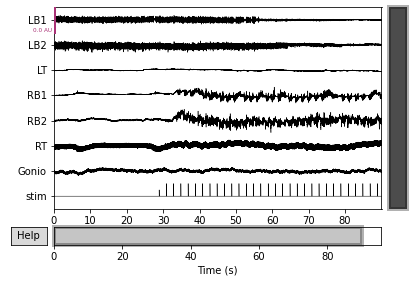

In [62]:
raw.copy().pick_channels(raw.ch_names[-8:]).plot(scalings=50e-5, duration=90);

In [63]:
raw.info.keys()

dict_keys(['acq_pars', 'acq_stim', 'ctf_head_t', 'description', 'dev_ctf_t', 'dig', 'experimenter', 'utc_offset', 'device_info', 'file_id', 'highpass', 'hpi_subsystem', 'kit_system_id', 'helium_info', 'line_freq', 'lowpass', 'meas_date', 'meas_id', 'proj_id', 'proj_name', 'subject_info', 'xplotter_layout', 'gantry_angle', 'bads', 'chs', 'comps', 'events', 'hpi_meas', 'hpi_results', 'projs', 'proc_history', 'custom_ref_applied', 'sfreq', 'dev_head_t', 'ch_names', 'nchan'])

In [64]:
raw.info['events']

[]

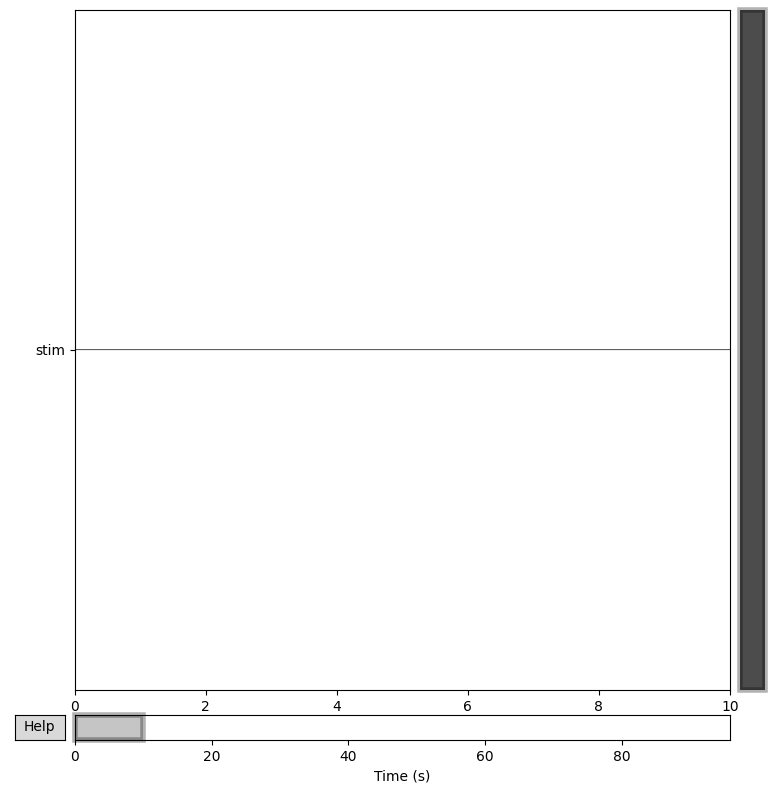

In [49]:
raw.copy().pick_channels(raw.ch_names[-1:]).plot();

31 events found
Event IDs: [1 2]


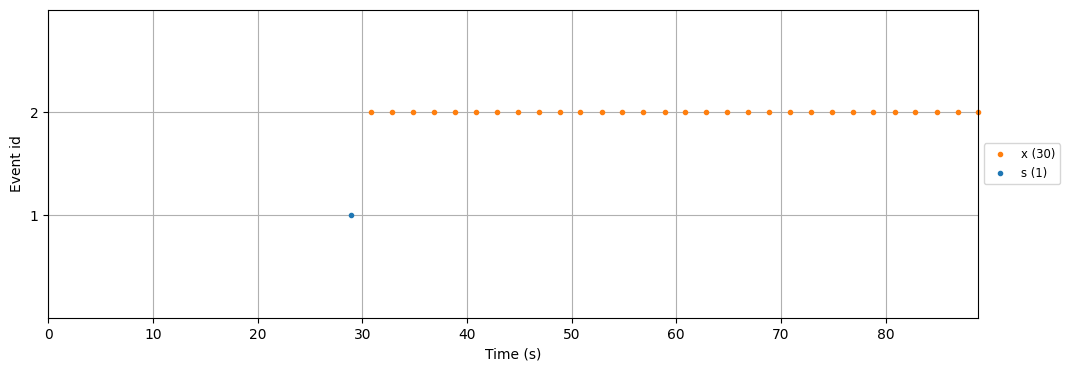

just making sure that the events register w. MNE


In [25]:
intdict=dict(s=1, x=2)
events=mne.find_events(raw)
fig,ax=plt.subplots(figsize=(15,4))
mne.viz.plot_events(events, sfreq=fs,first_samp=raw.first_samp, event_id=intdict, axes=ax)
print('just making sure that the events register w. MNE')

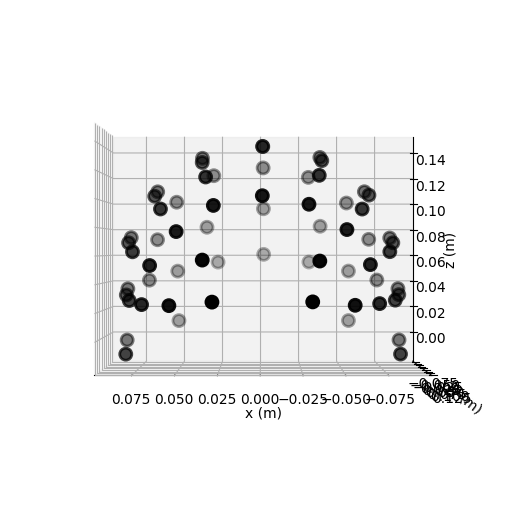

In [26]:
raw.plot_sensors('3d', block=True); 

In [27]:
epochs=mne.Epochs(raw, events=events)

Not setting metadata
31 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated


Seems like stim is happening towards the end:

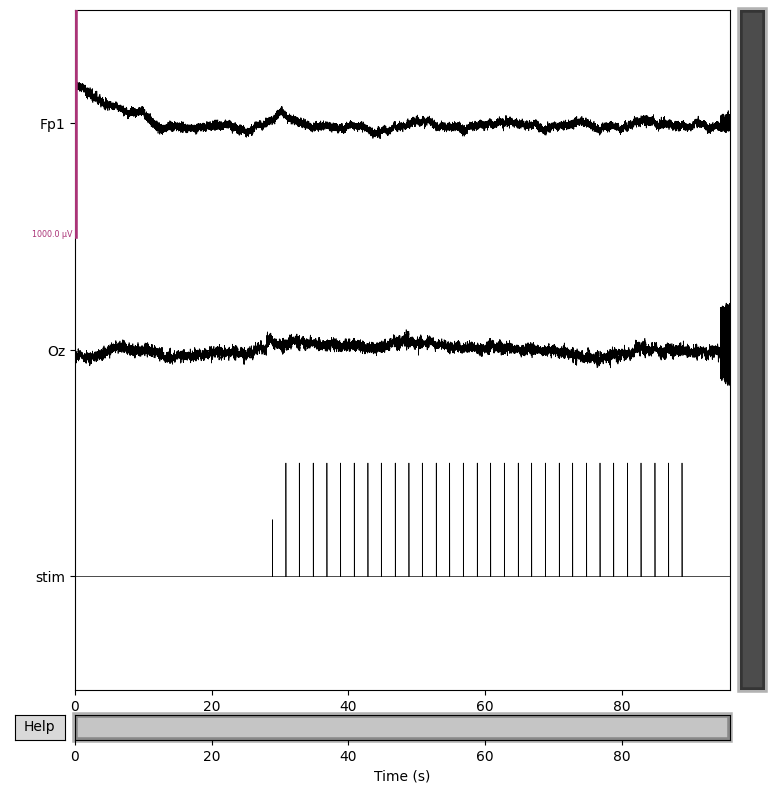

In [50]:
raw.copy().pick_channels(['Fp1', 'Oz', 'stim']).plot(scalings=50e-5, duration=raw.times[-1],event_color='cyan');

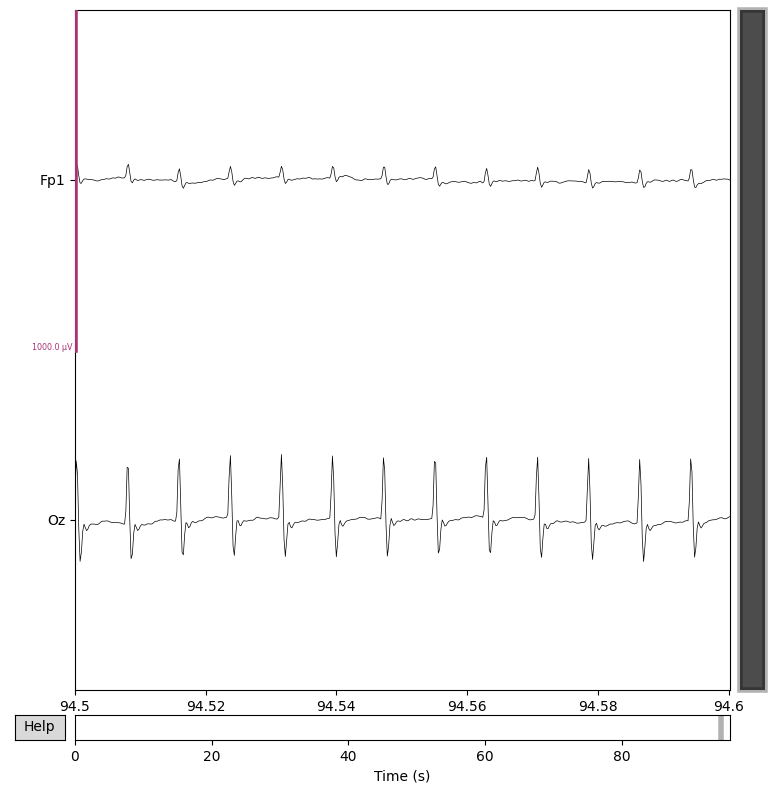

In [29]:
raw.copy().pick_channels(['Fp1', 'Oz']).plot(scalings=50e-5, start=94.5, duration=0.10 ,event_color='cyan');

Let's zoom in:

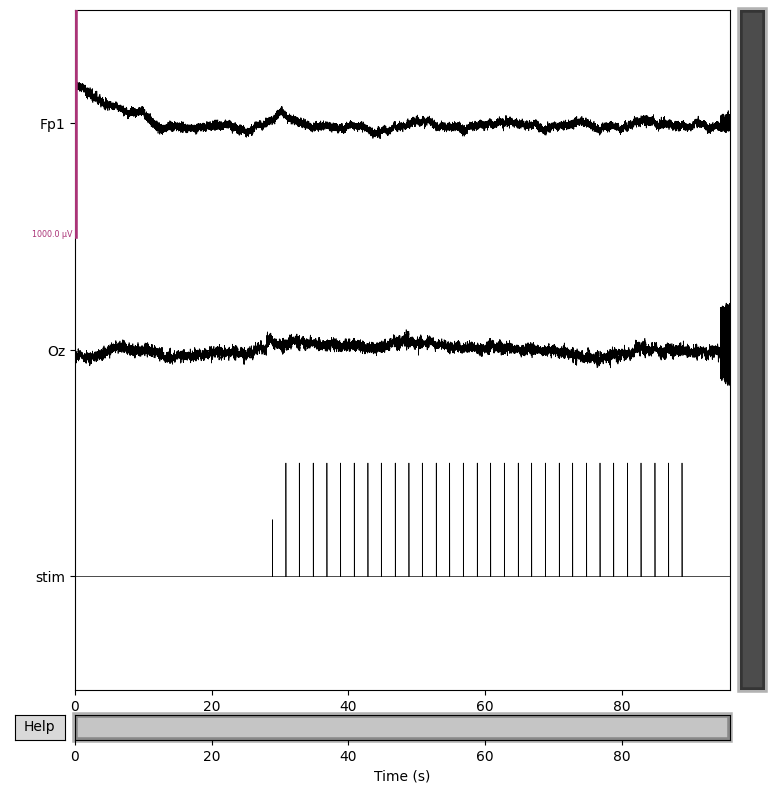

In [30]:
raw.copy().pick_channels(['Fp1', 'Oz', 'stim']).plot(scalings=50e-5, duration=raw.times[-1],event_color='cyan');

In [31]:
ls /home/tmorshed/projects/def-johngrif/tmorshed/data/nmod/*/*/*/*

ls: cannot access /home/tmorshed/projects/def-johngrif/tmorshed/data/nmod/*/*/*/*: No such file or directory


Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
0 :


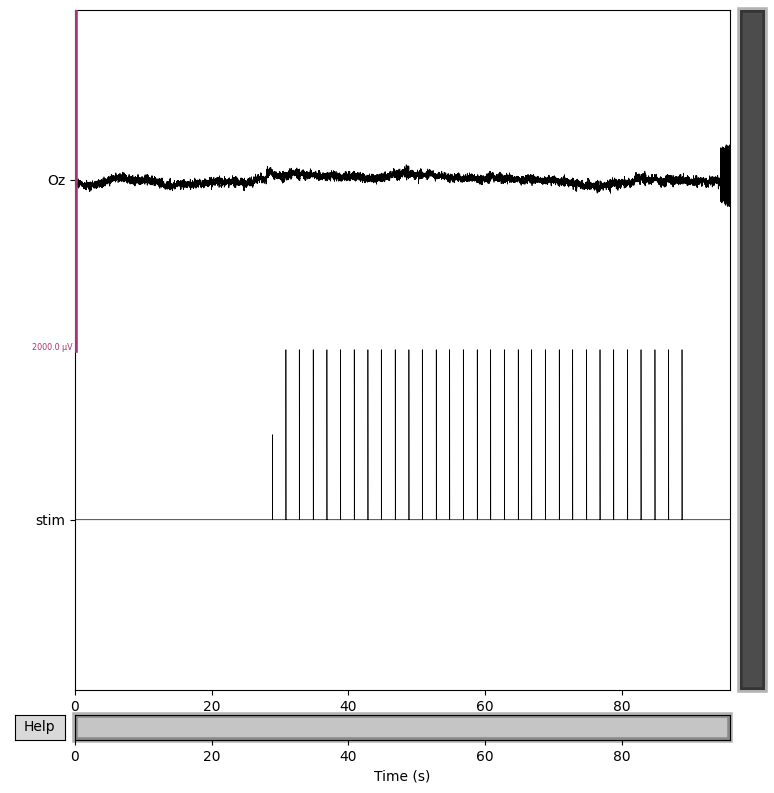

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
1 :


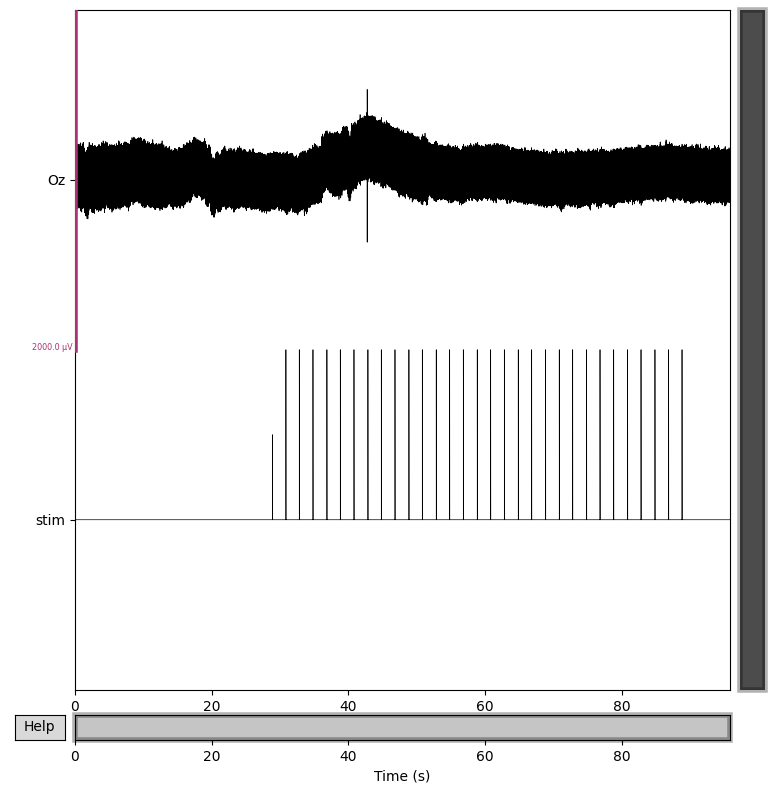

Creating RawArray with float64 data, n_channels=72, n_times=479400
    Range : 0 ... 479399 =      0.000 ...    95.880 secs
Ready.
2 :


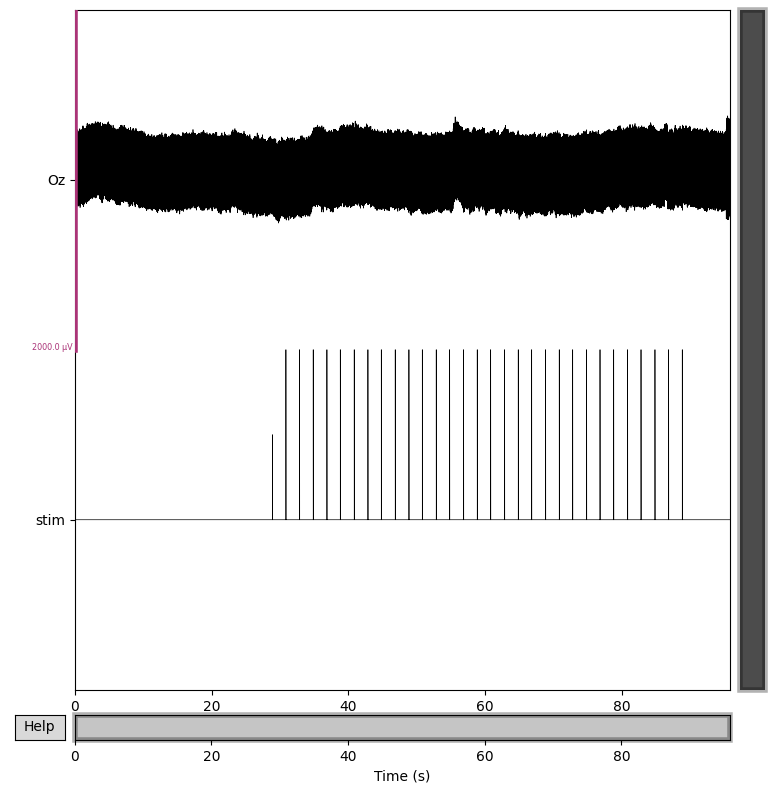

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
3 :


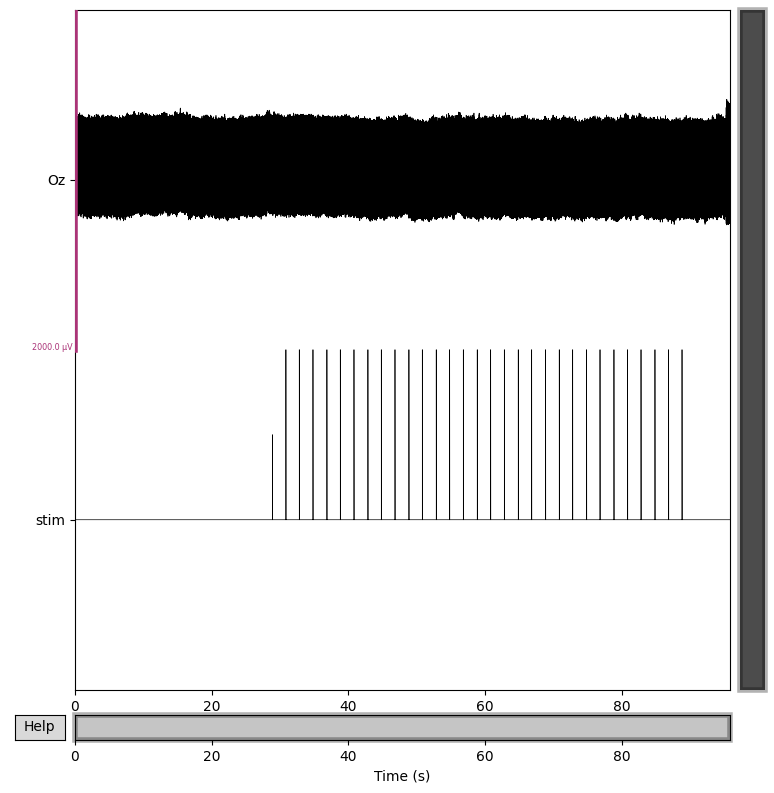

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
4 :


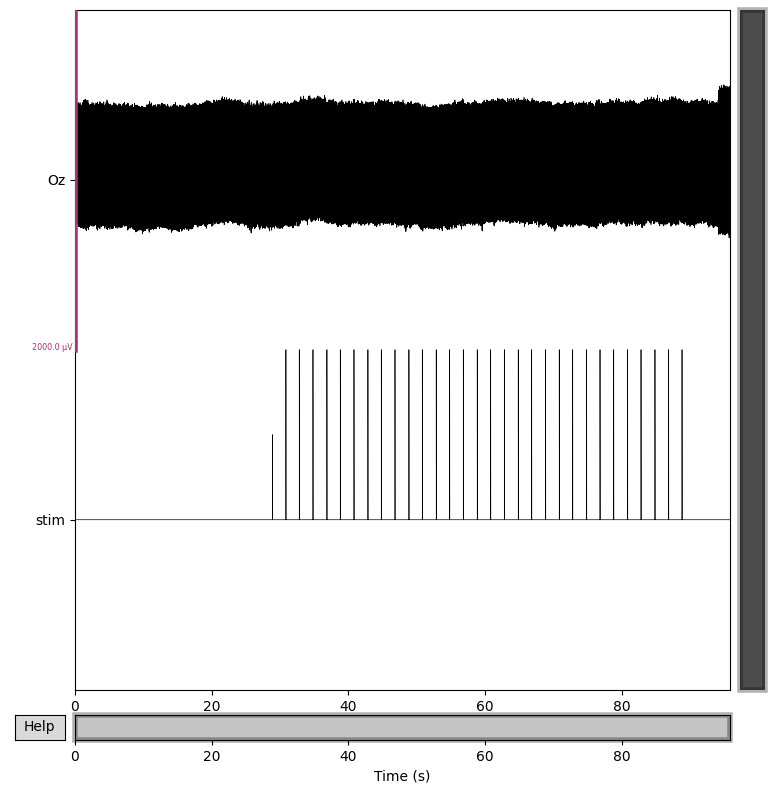

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
5 :


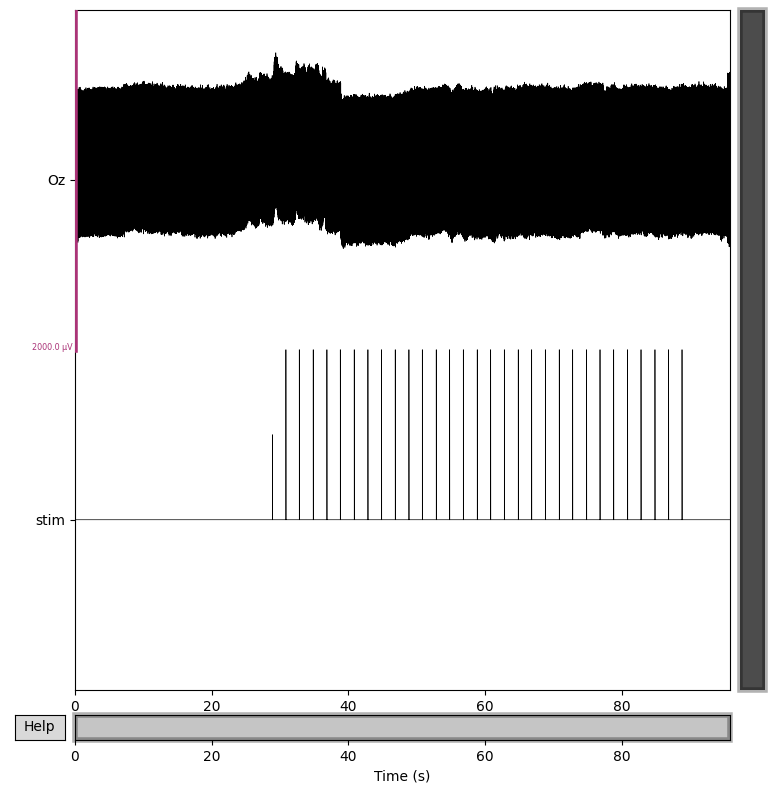

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
6 :


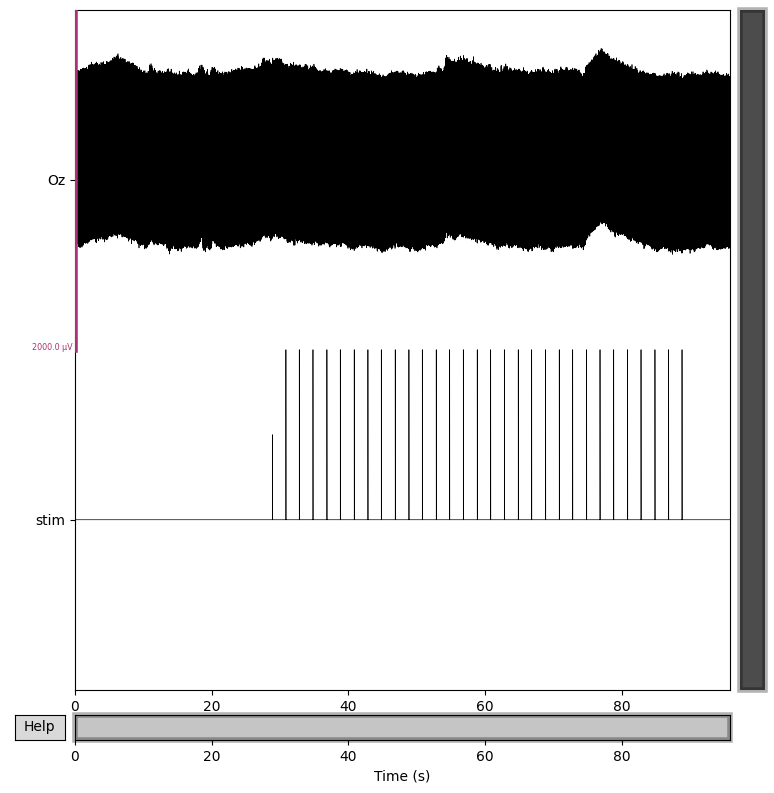

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
7 :


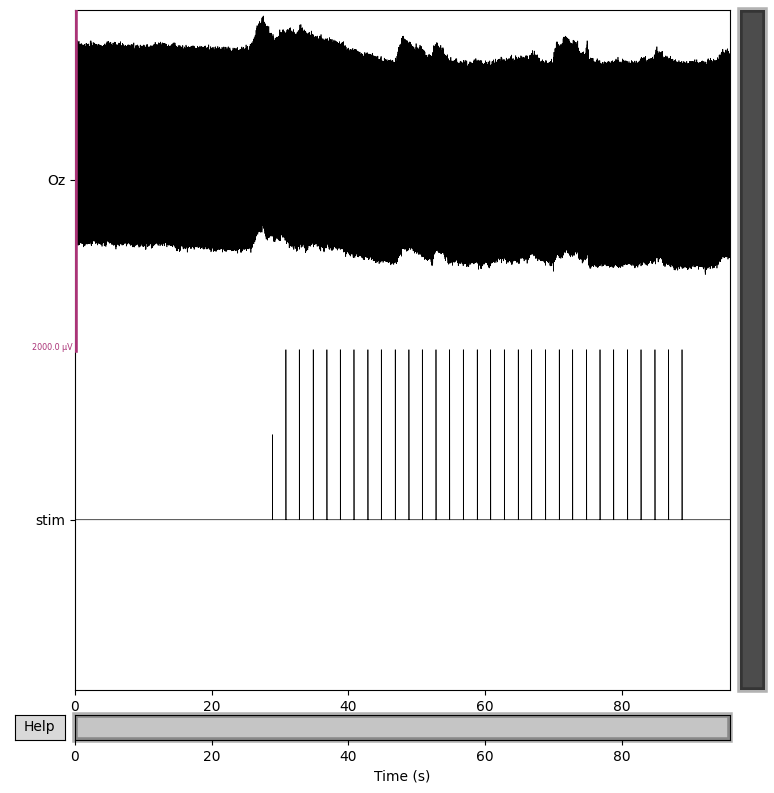

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
8 :


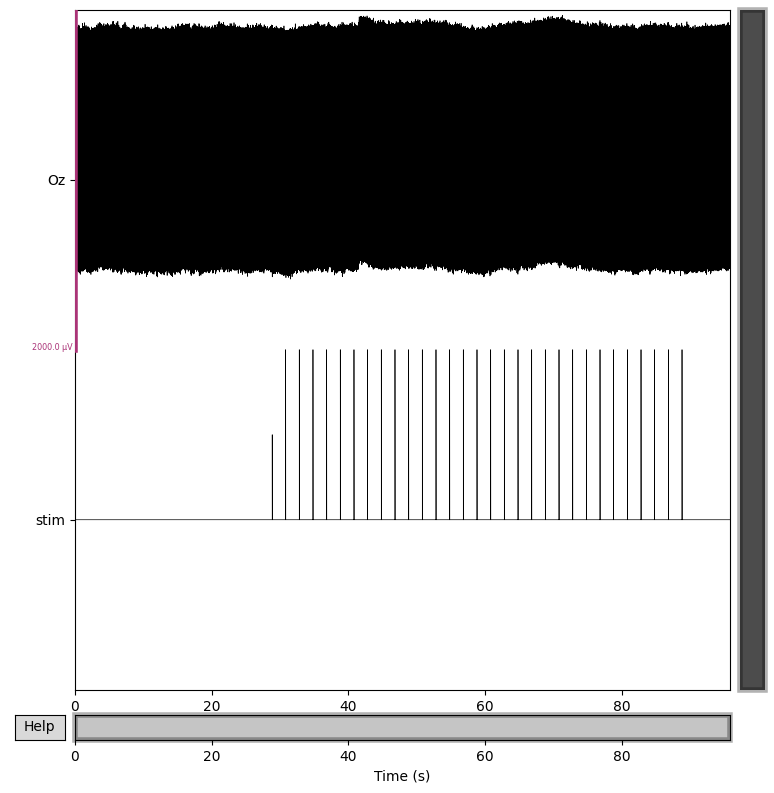

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
9 :


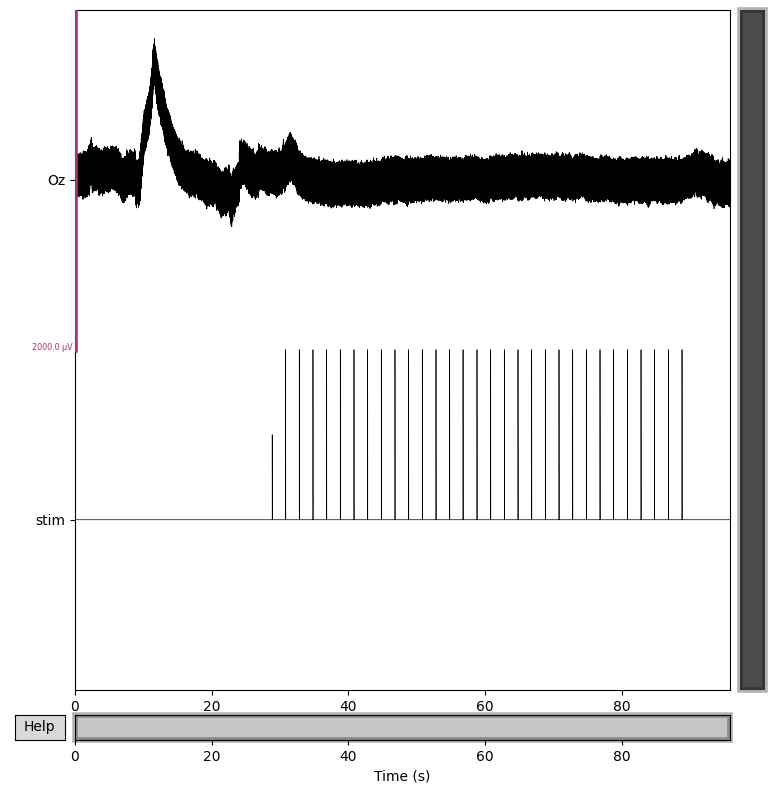

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
10 :


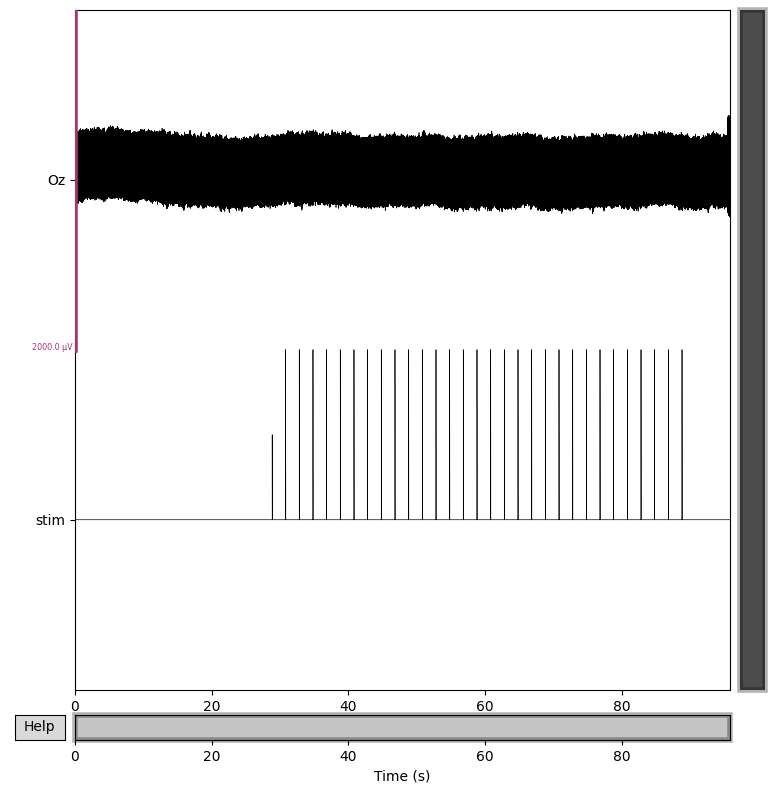

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
11 :


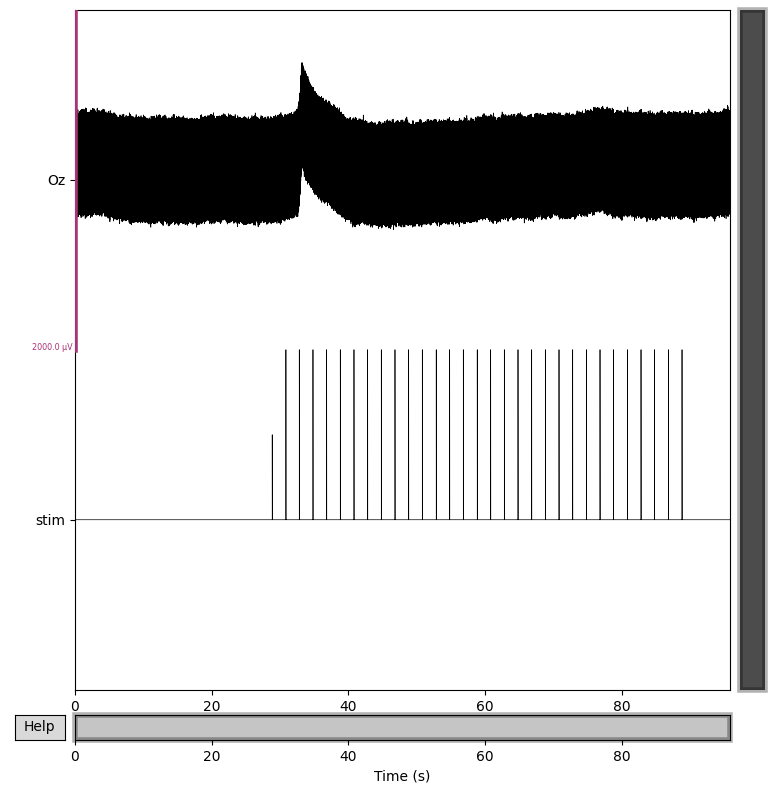

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
12 :


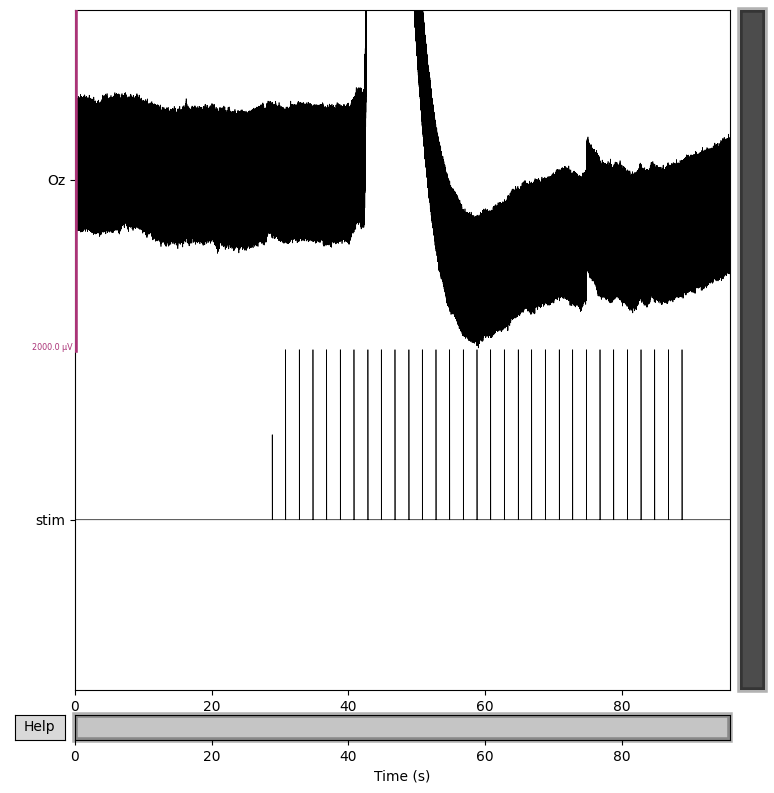

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
13 :


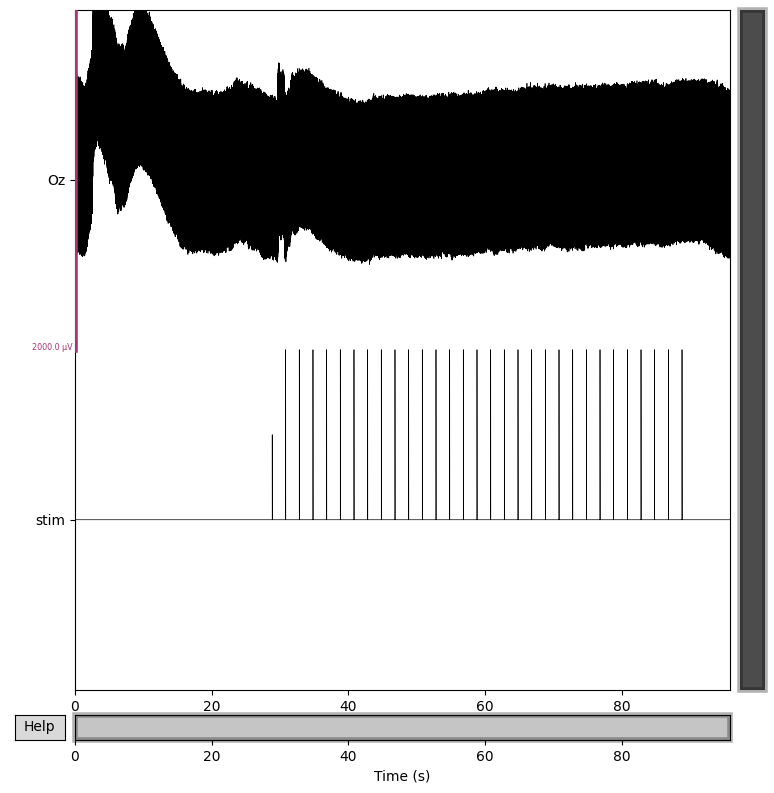

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
14 :


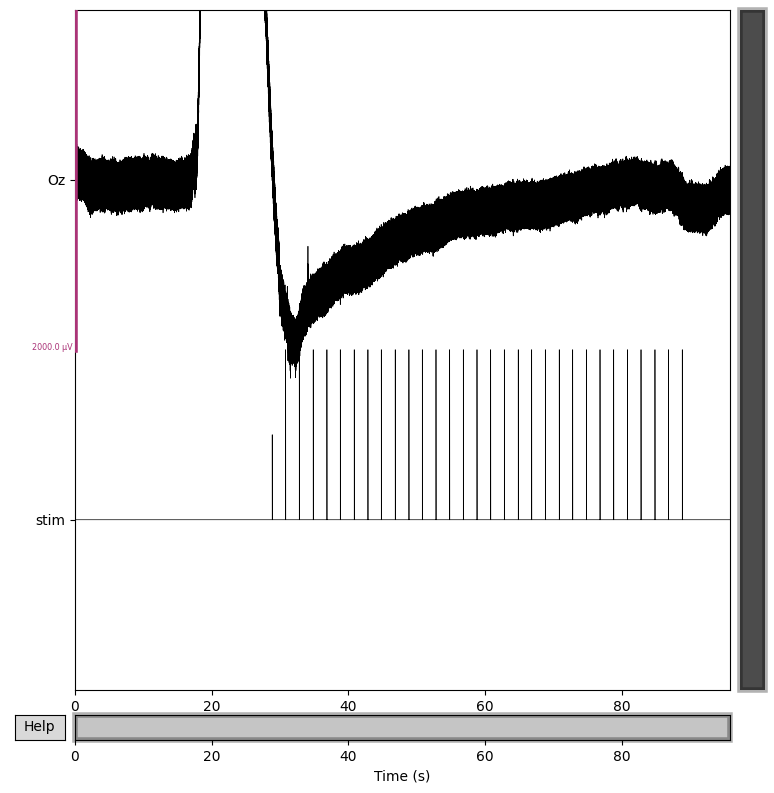

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
15 :


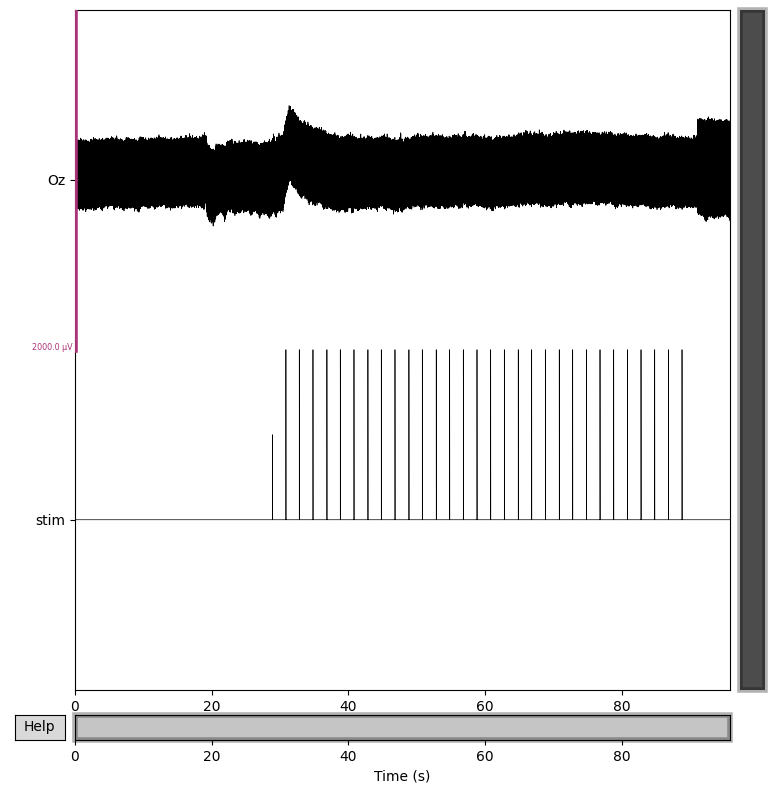

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
16 :


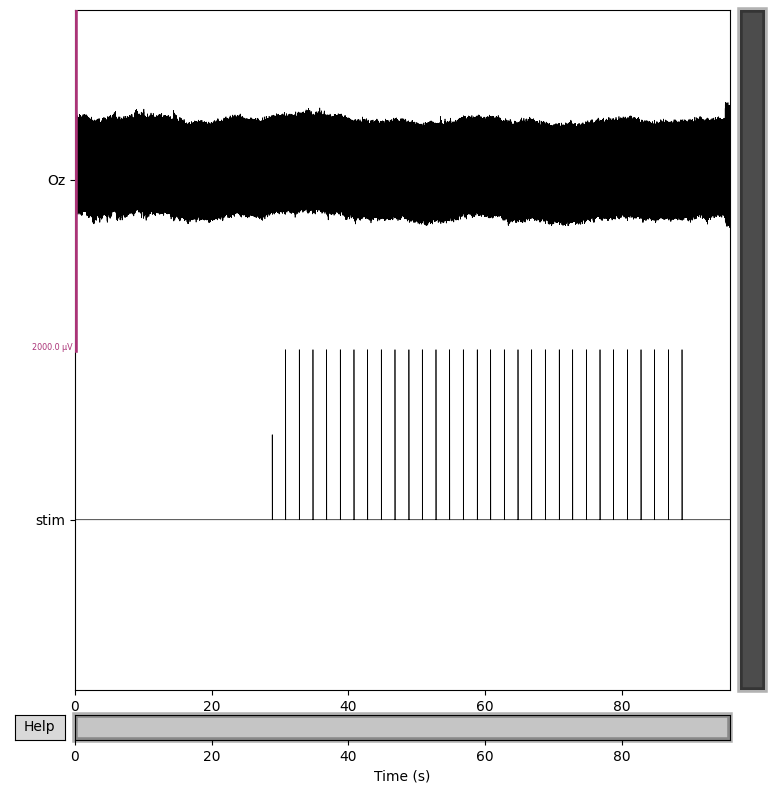

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
17 :


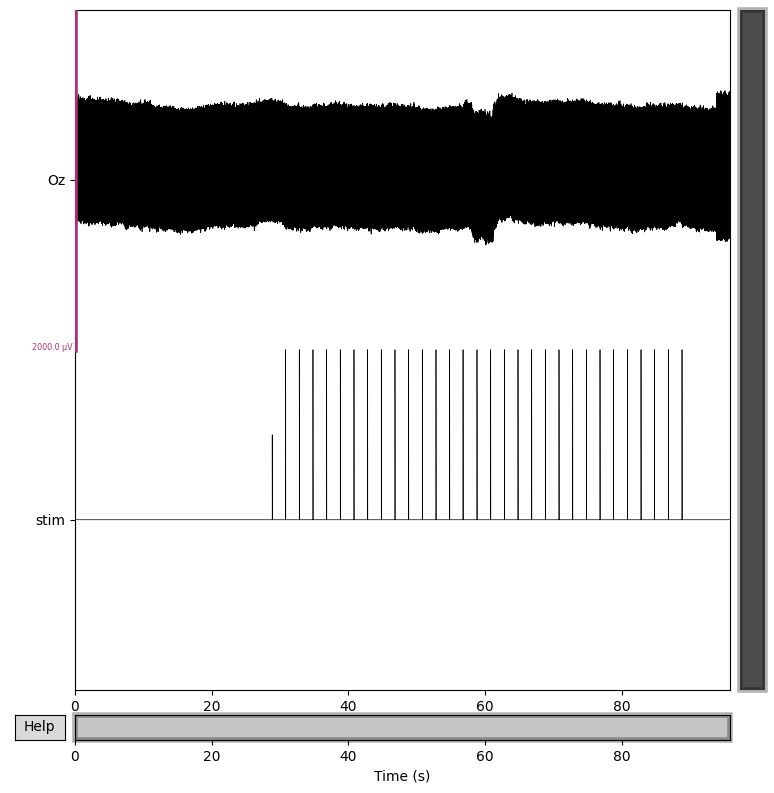

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
18 :


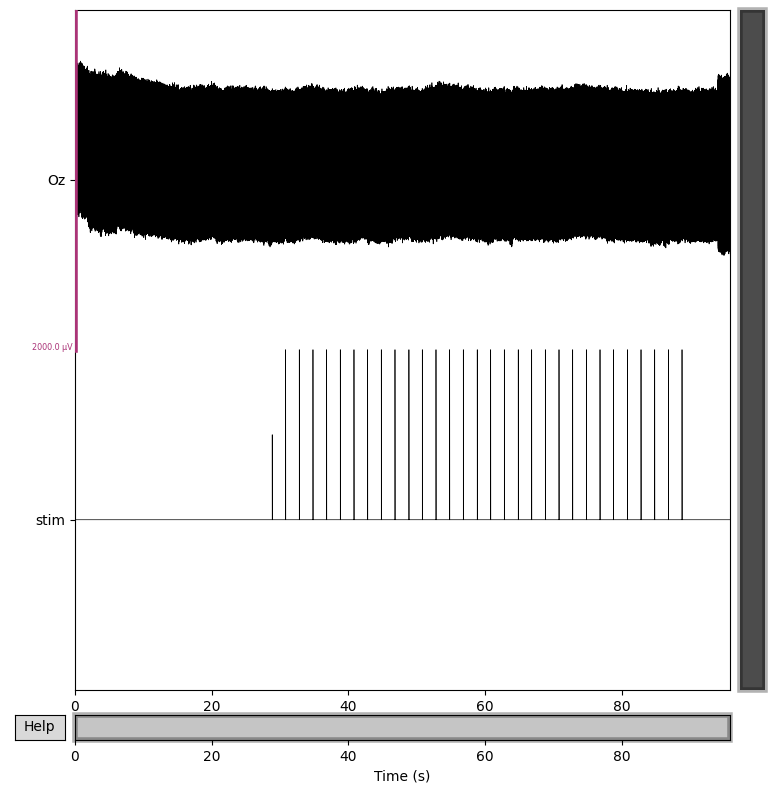

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
19 :


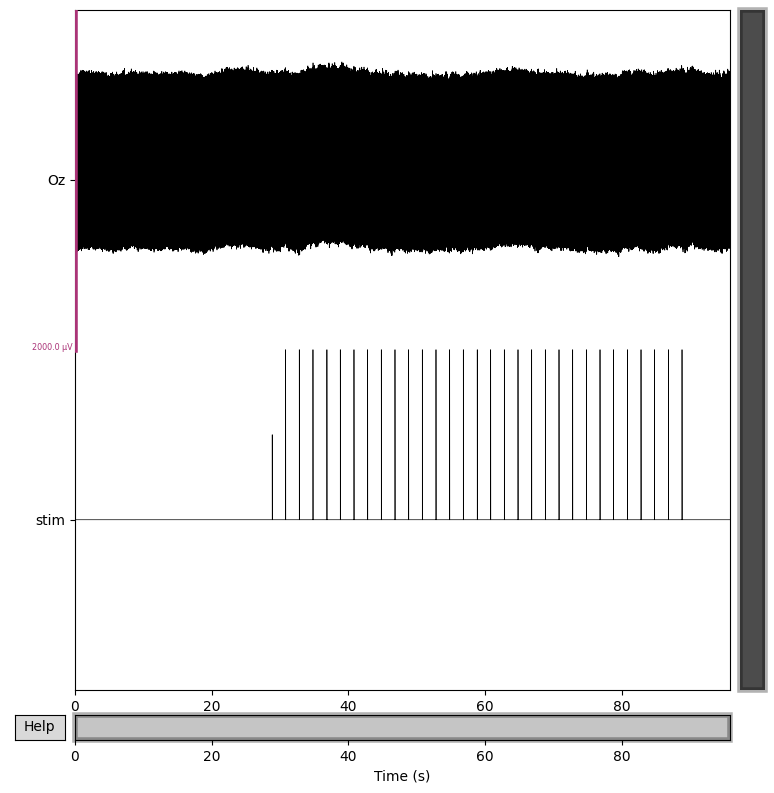

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
20 :


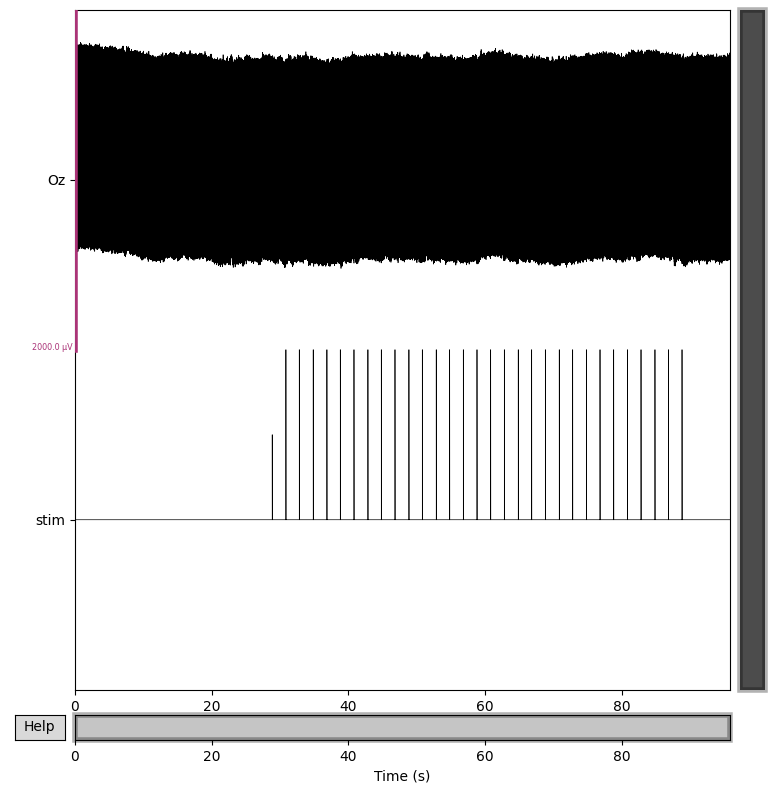

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
21 :


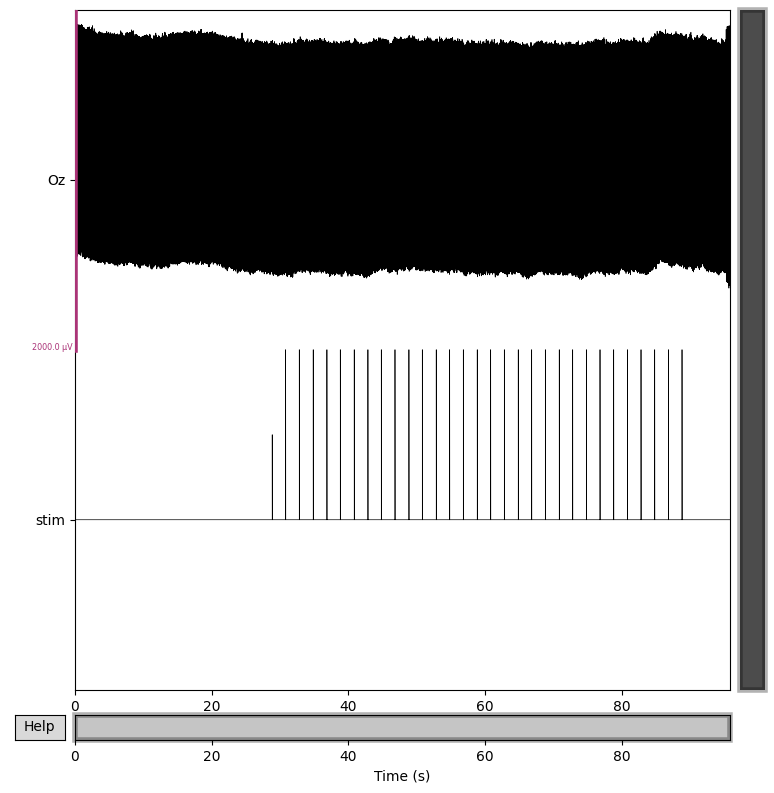

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
22 :


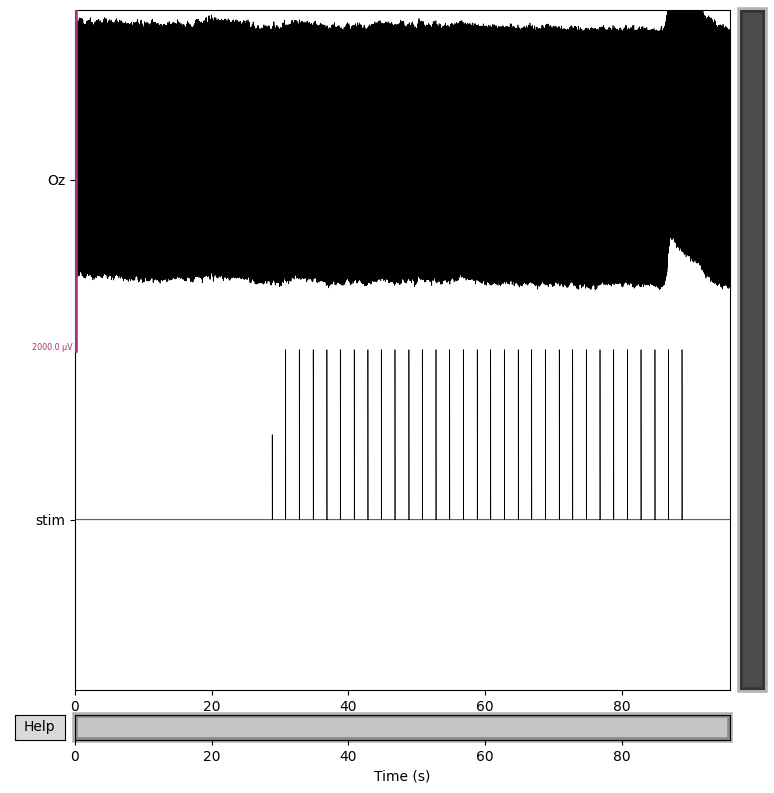

In [32]:
for i in range(23):
    _marker, _df_data=load_to_df(markers, npzs, i)
    _raw=df_to_mne(_marker, _df_data)
    print(i, ":")
    _raw.copy().pick_channels(['stim', 'Oz']).plot(start=0, duration=raw.times[-1], n_channels=2, scalings=1e-3);

In [33]:
_marker

{'fs': 5000.0,
 'patientId': 0,
 'clinScore': 1,
 'chNames': ['Fp1',
  'Fp2',
  'F7',
  'F3',
  'Fz',
  'F4',
  'F8',
  'FC5',
  'FC1',
  'FC2',
  'FC6',
  'T7',
  'C3',
  'Cz',
  'C4',
  'T8',
  'TP9',
  'CP5',
  'CP1',
  'CP2',
  'CP6',
  'TP10',
  'P7',
  'P3',
  'Pz',
  'P4',
  'P8',
  'PO9',
  'O1',
  'Oz',
  'O2',
  'PO10',
  'AF7',
  'AF3',
  'AF4',
  'AF8',
  'F5',
  'F1',
  'F2',
  'F6',
  'FT9',
  'FT7',
  'FC3',
  'FC4',
  'FT8',
  'FT10',
  'C5',
  'C1',
  'C2',
  'C6',
  'TP7',
  'CP3',
  'CPz',
  'CP4',
  'TP8',
  'P5',
  'P1',
  'P2',
  'P6',
  'PO7',
  'PO3',
  'POz',
  'PO4',
  'PO8',
  'LB1',
  'LB2',
  'LT',
  'RB1',
  'RB2',
  'RT',
  'Gonio'],
 'stimInt': 2.1,
 'stimCont': 2,
 'stimType': 'ring',
 'hemisphere': 'L',
 'mrk': [{'type': '', 'idx': 1},
  {'type': 's', 'idx': 144401},
  {'type': 'x', 'idx': 154201},
  {'type': 'x', 'idx': 164201},
  {'type': 'x', 'idx': 174401},
  {'type': 'x', 'idx': 184401},
  {'type': 'x', 'idx': 194201},
  {'type': 'x', 'idx': 20440

In [34]:
pwd

'/external/rprshnas01/netdata_kcni/jglab/MemberSpaces/po/lab/repos/bme1500/po_scratch/data/bme1500_eeg_data'

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
0 :


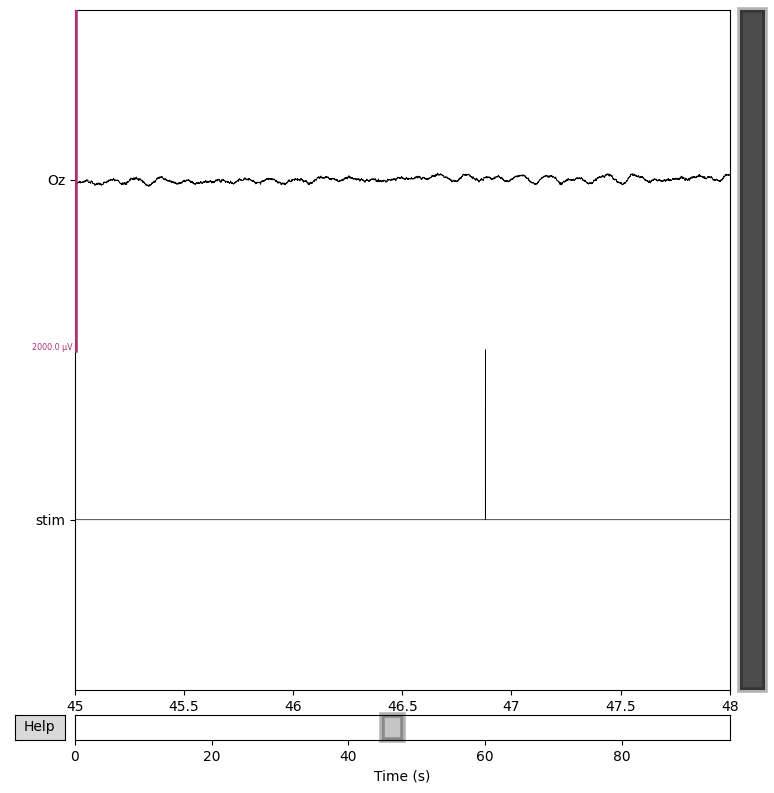

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
1 :


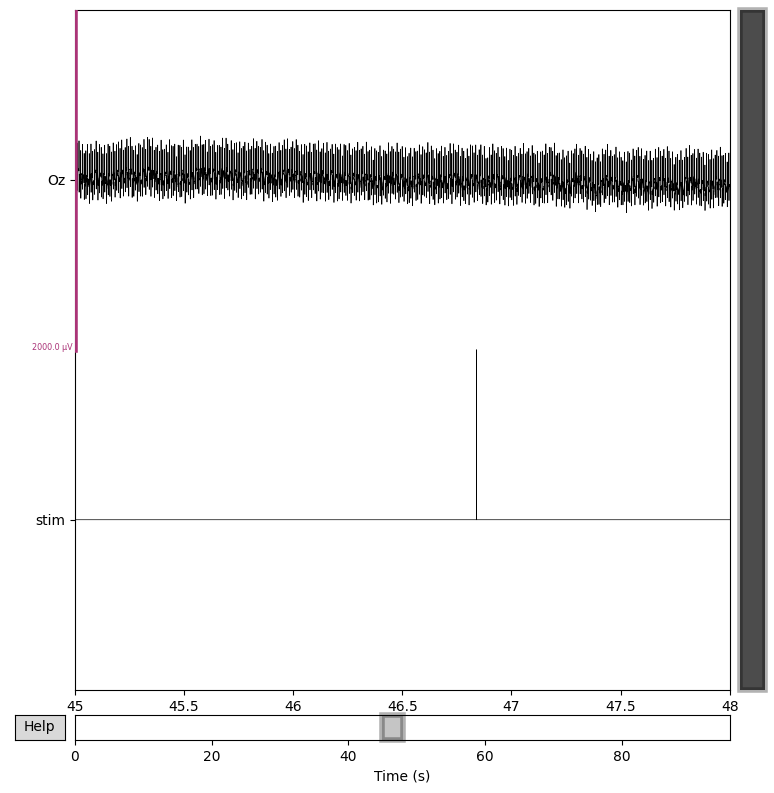

Creating RawArray with float64 data, n_channels=72, n_times=479400
    Range : 0 ... 479399 =      0.000 ...    95.880 secs
Ready.
2 :


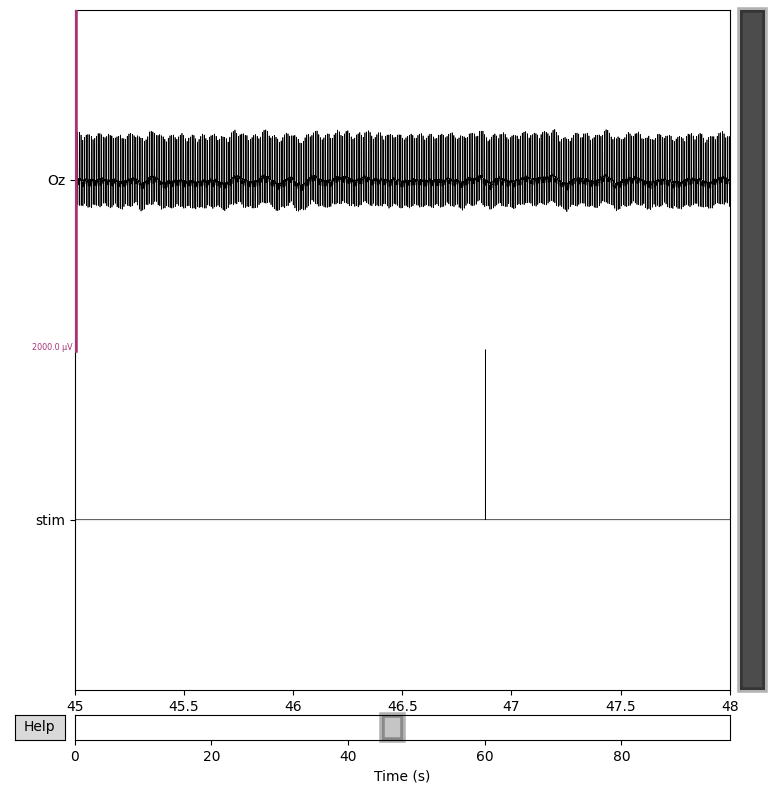

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
3 :


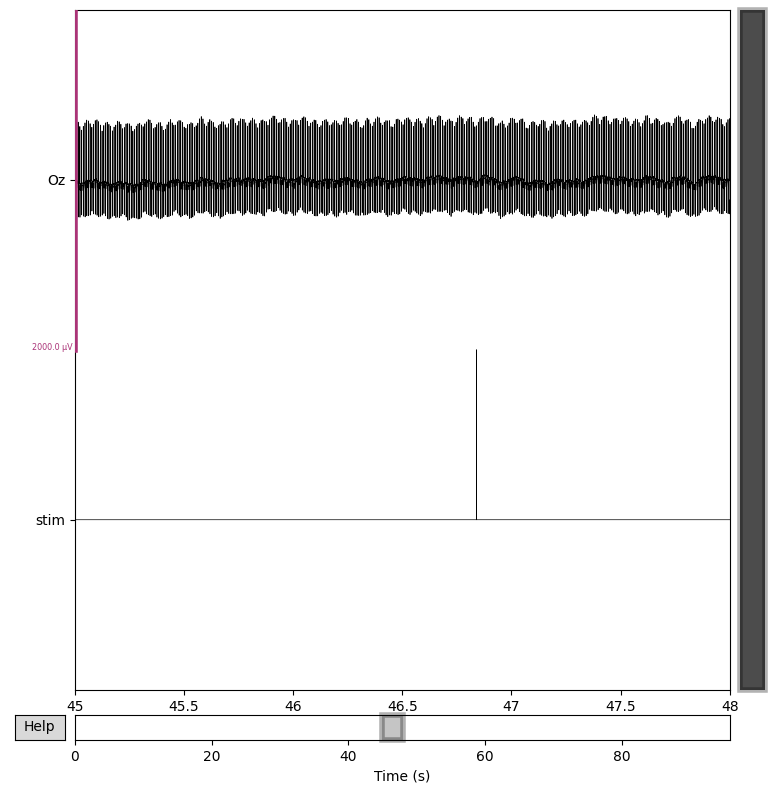

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
4 :


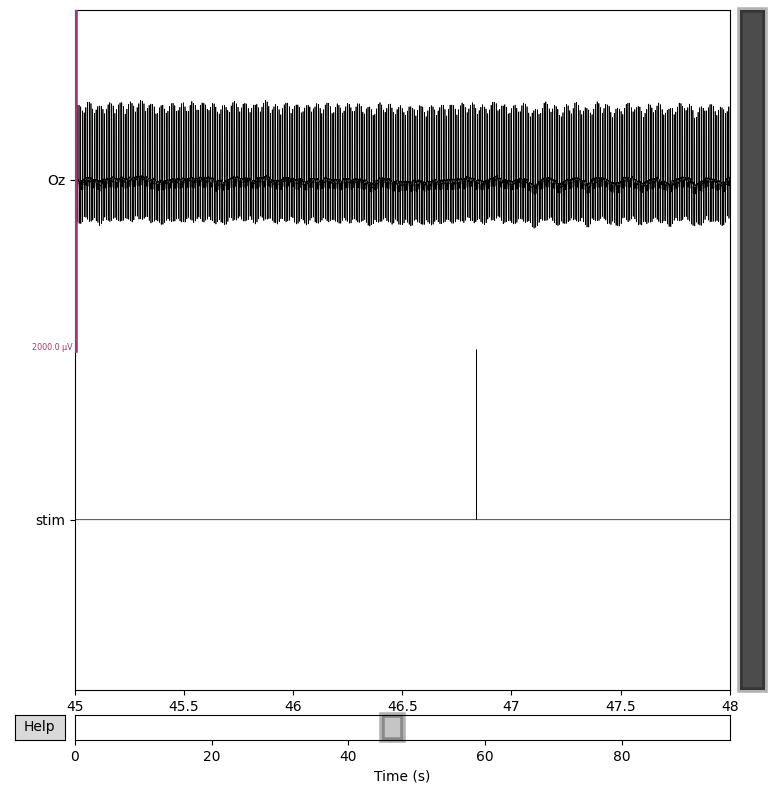

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
5 :


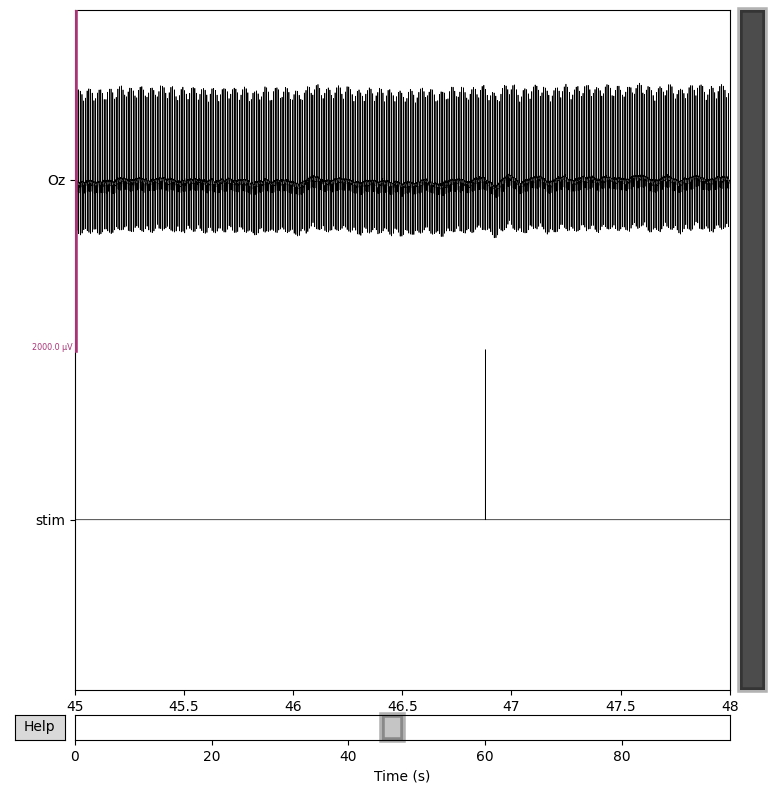

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
6 :


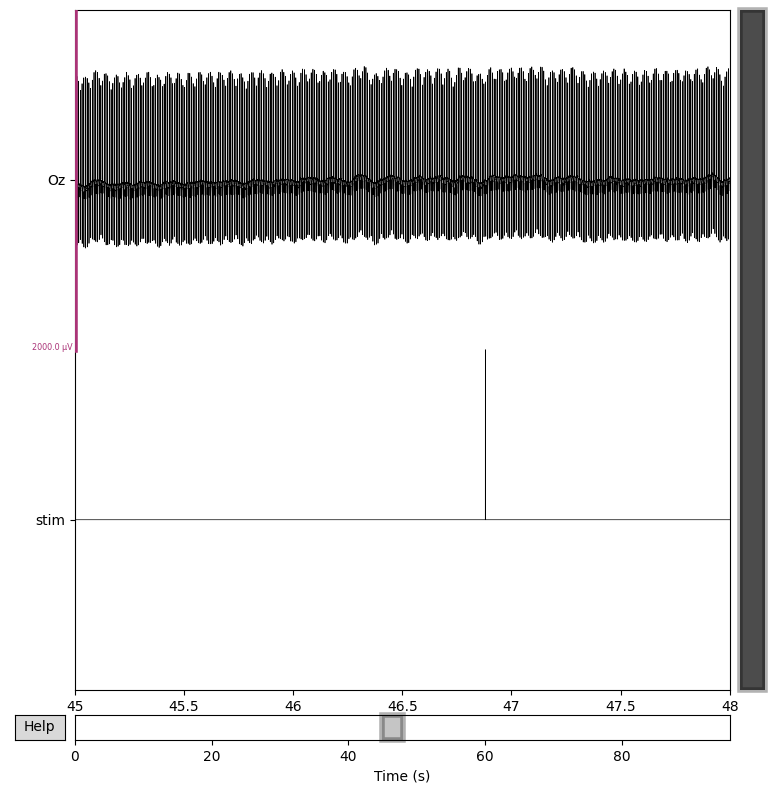

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
7 :


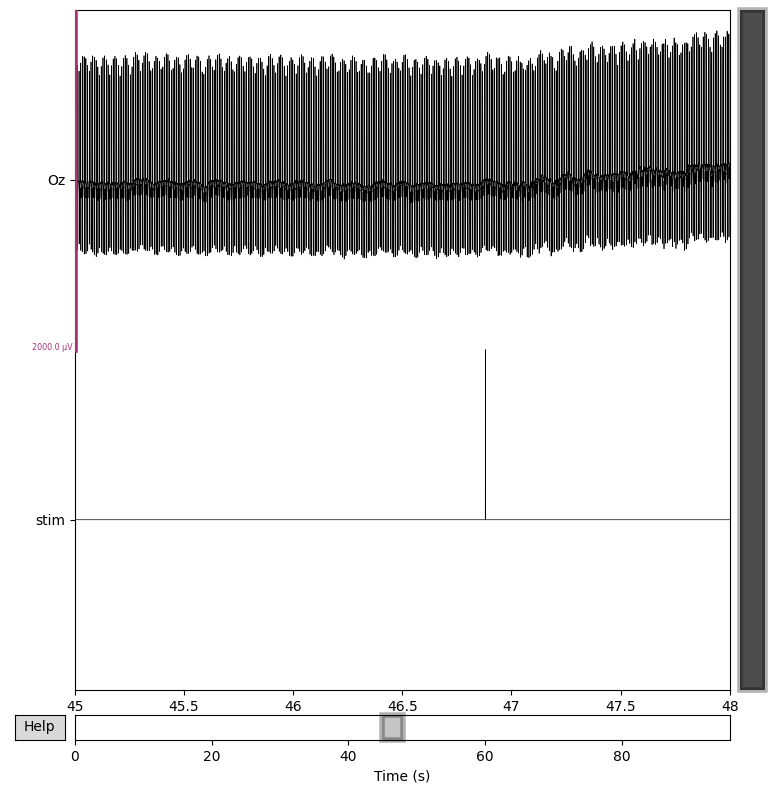

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
8 :


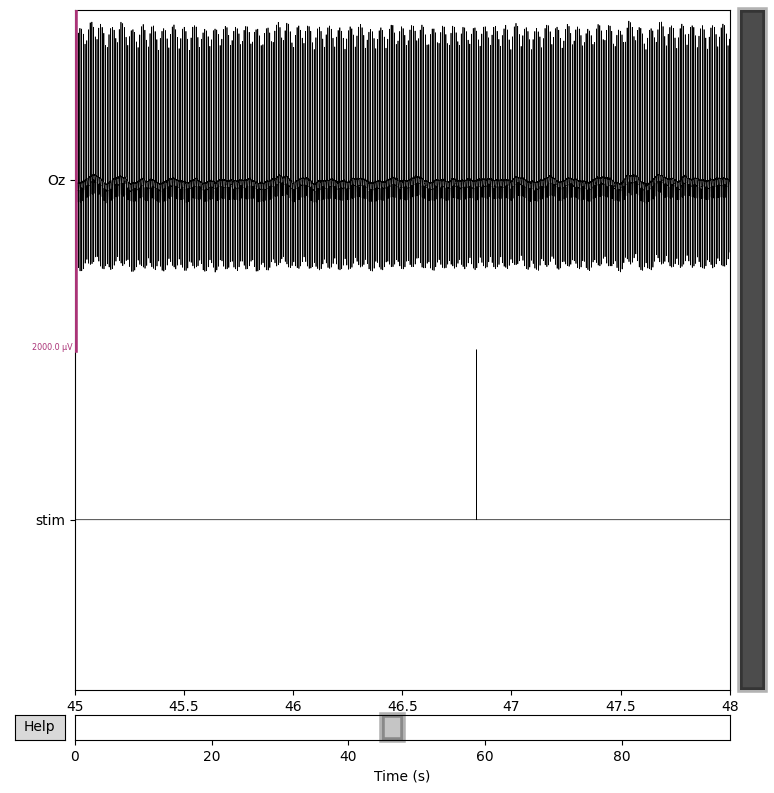

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
9 :


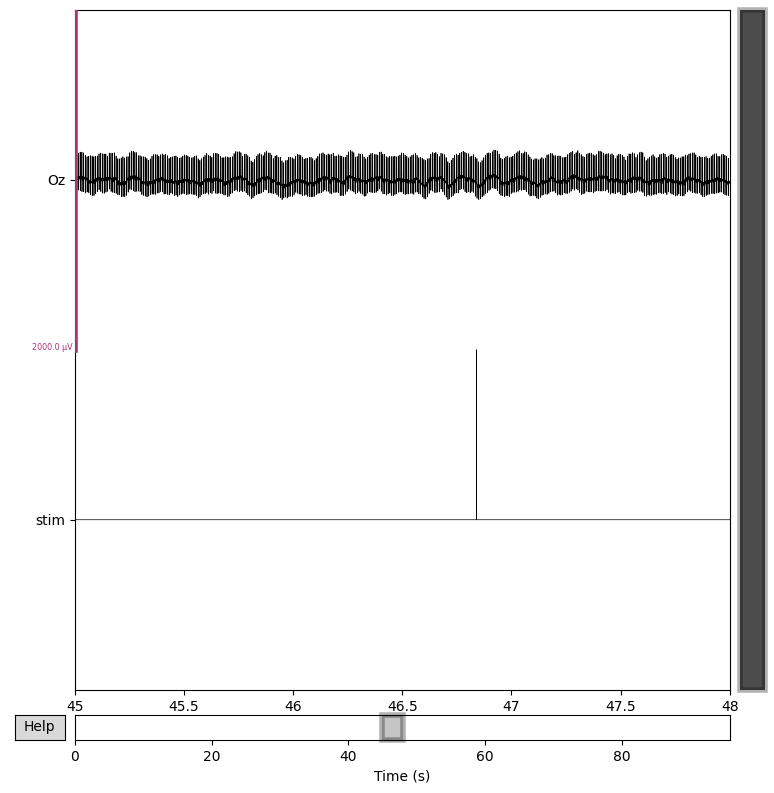

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
10 :


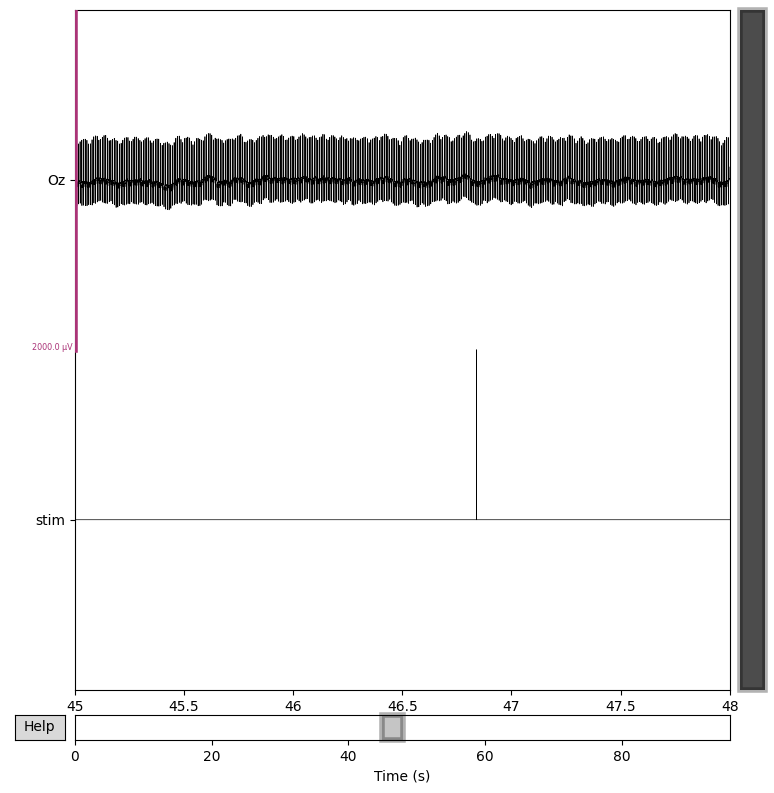

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
11 :


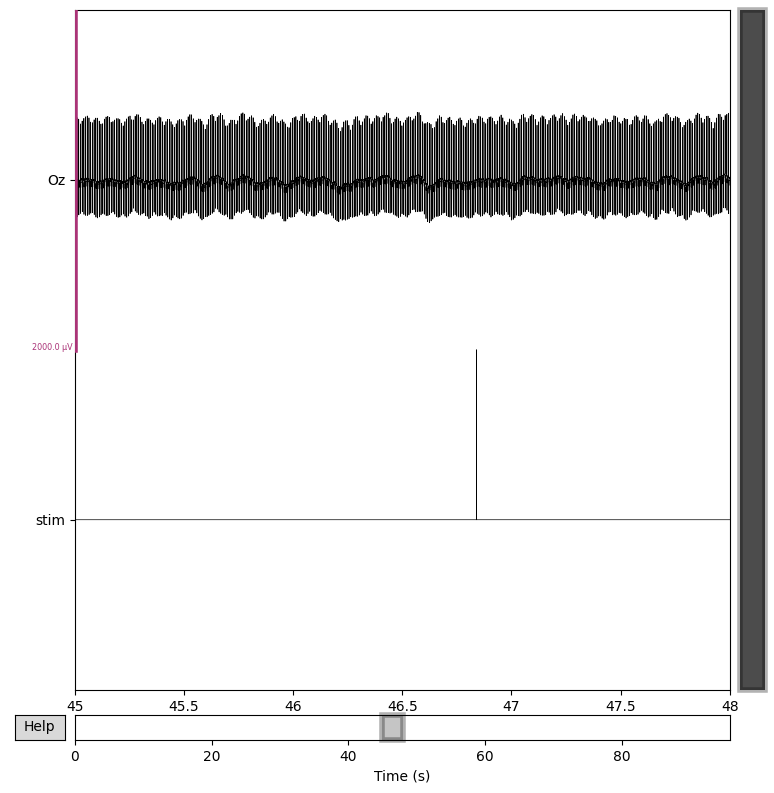

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
12 :


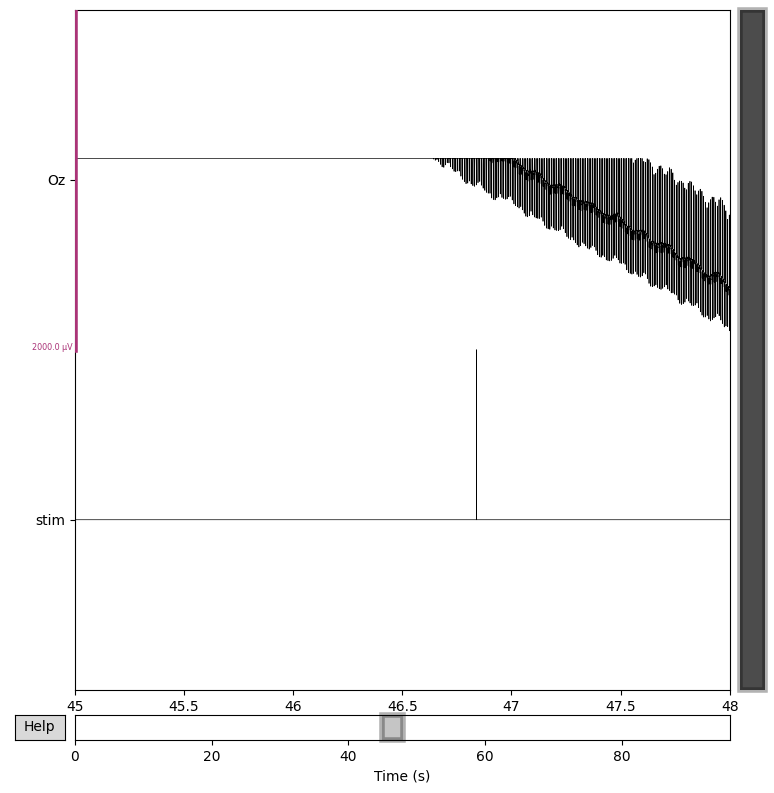

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
13 :


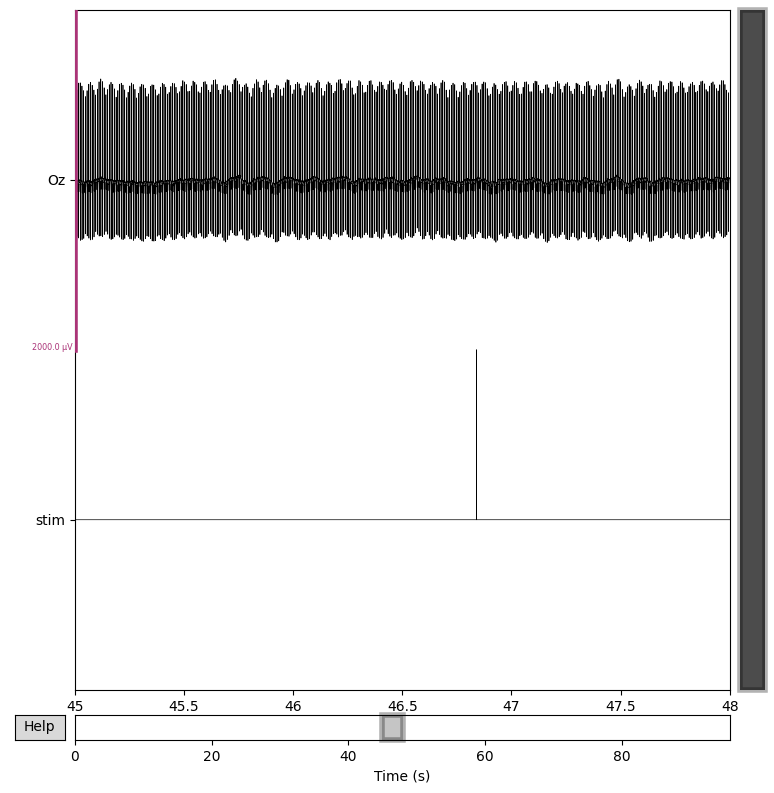

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
14 :


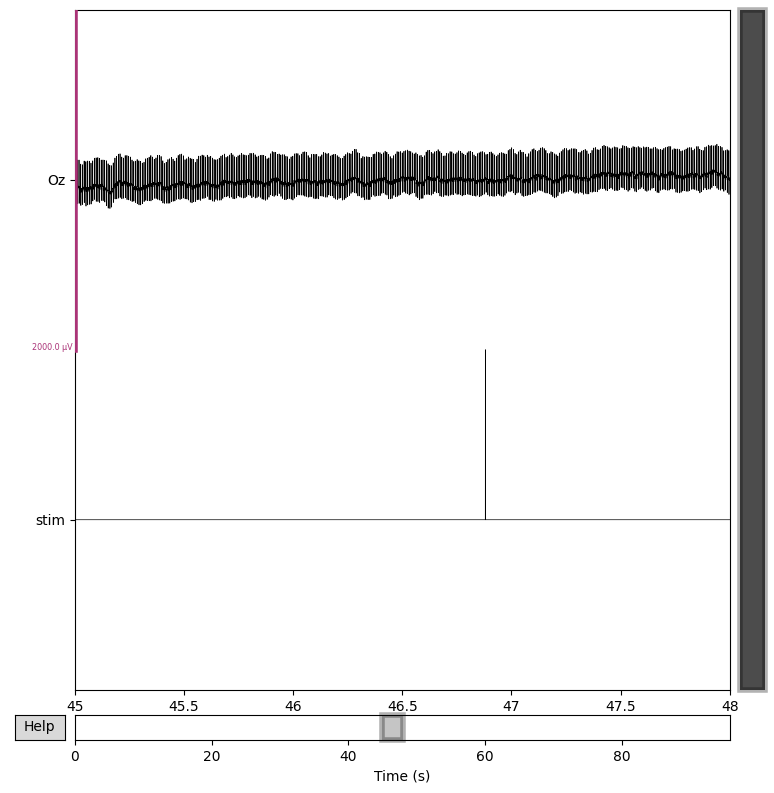

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
15 :


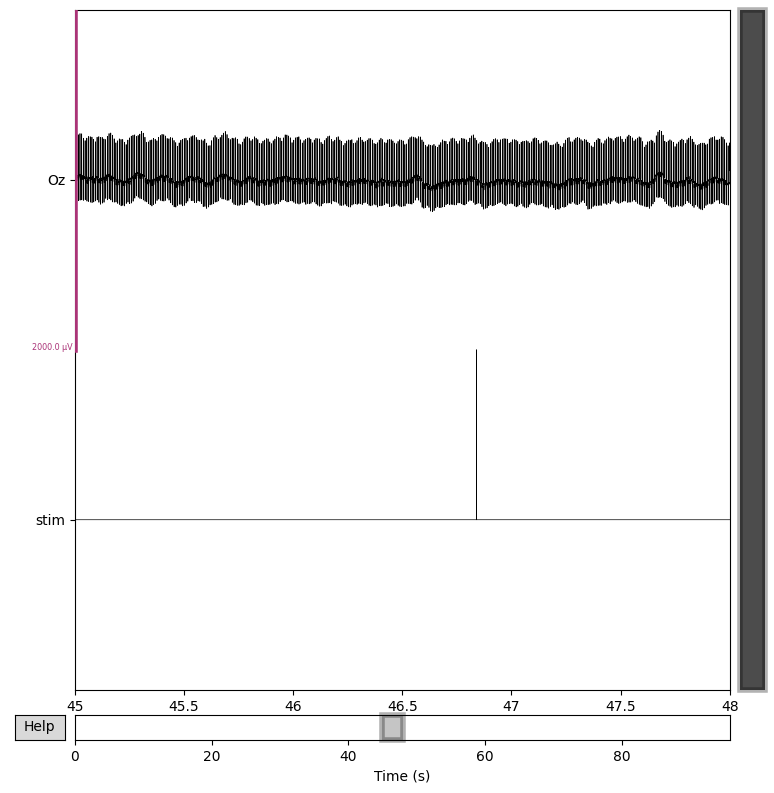

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
16 :


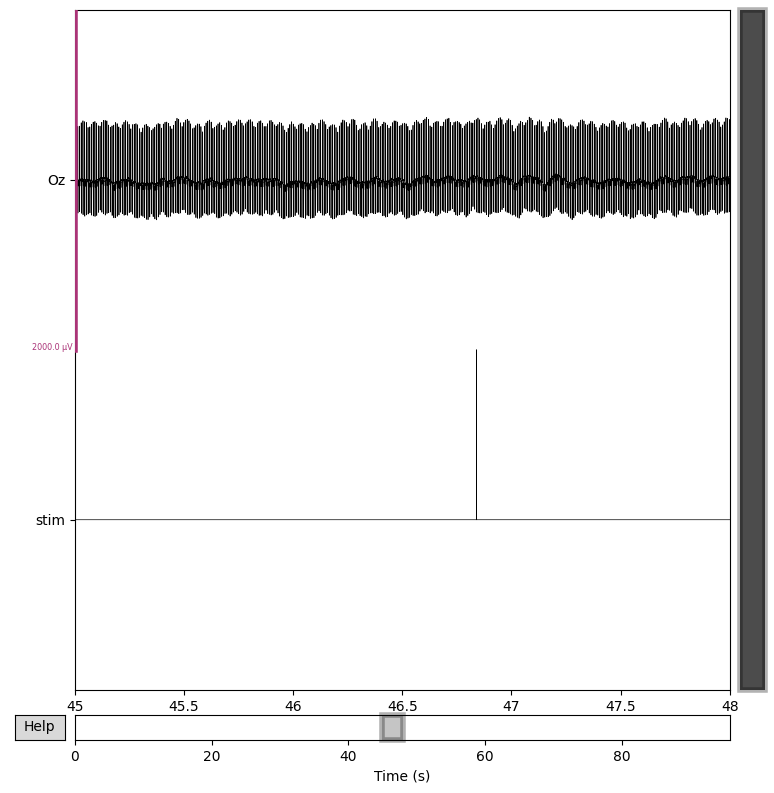

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
17 :


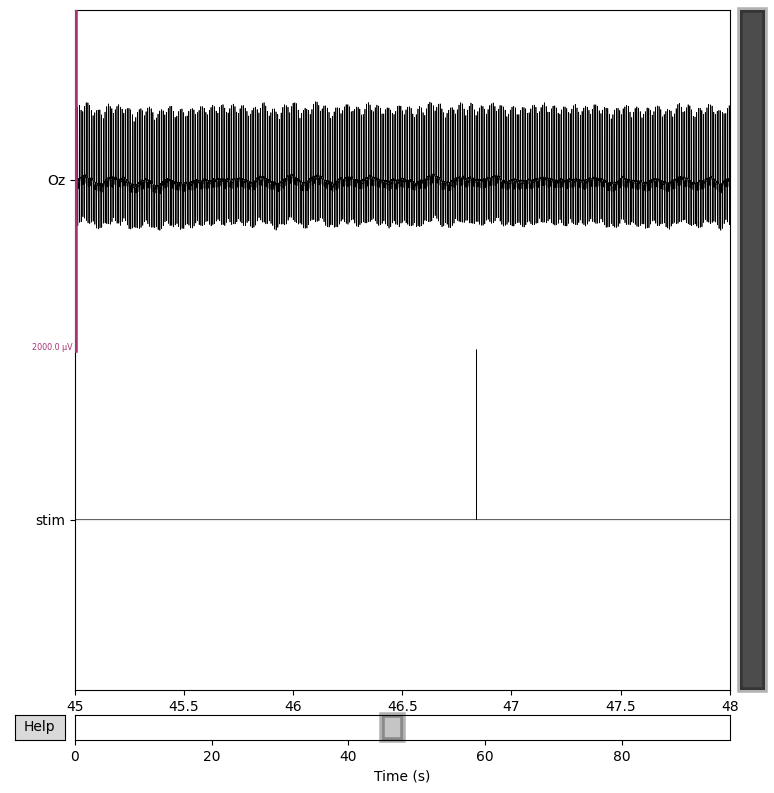

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
18 :


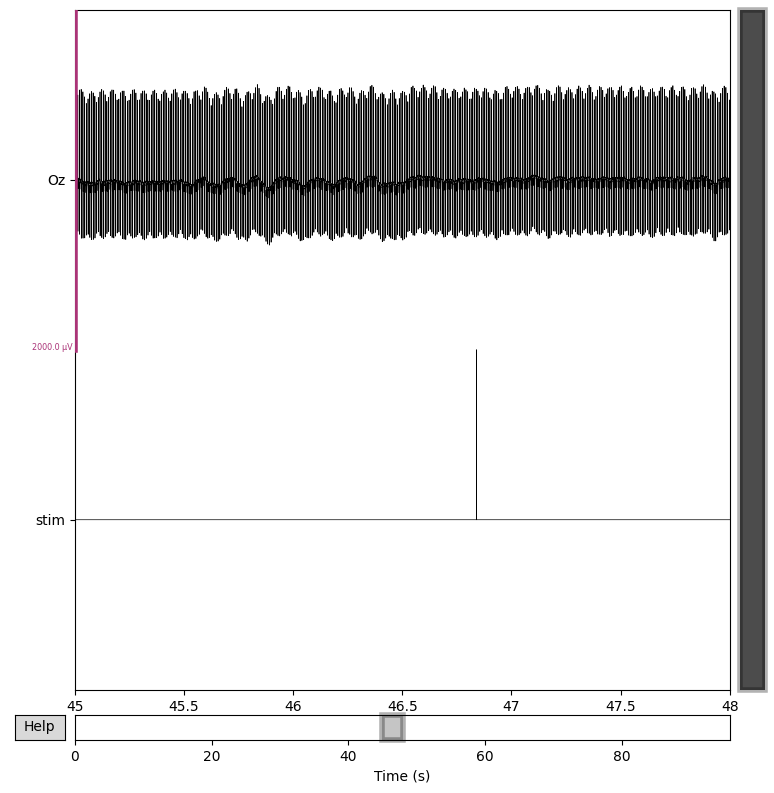

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
19 :


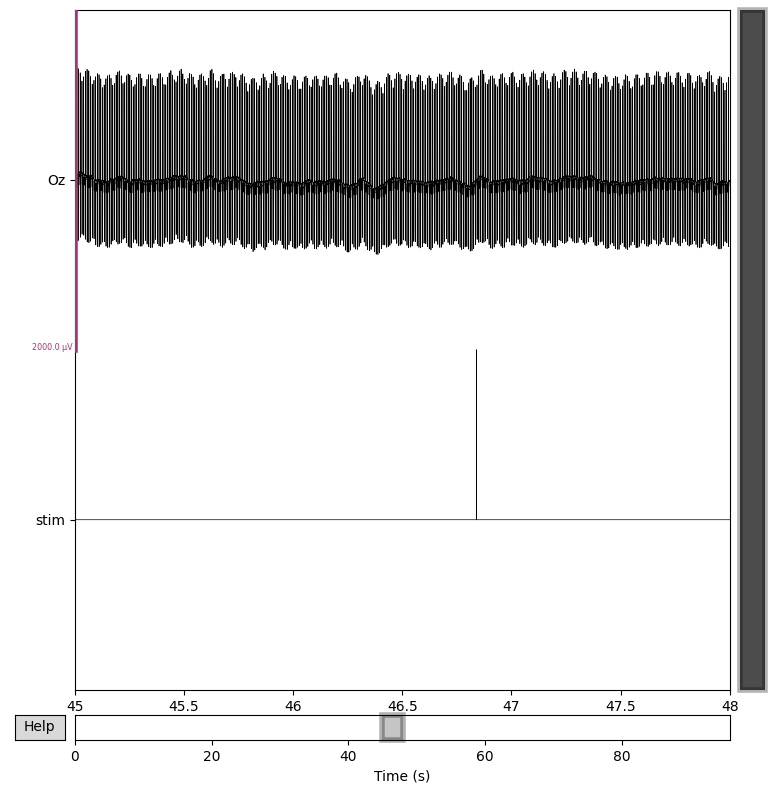

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
20 :


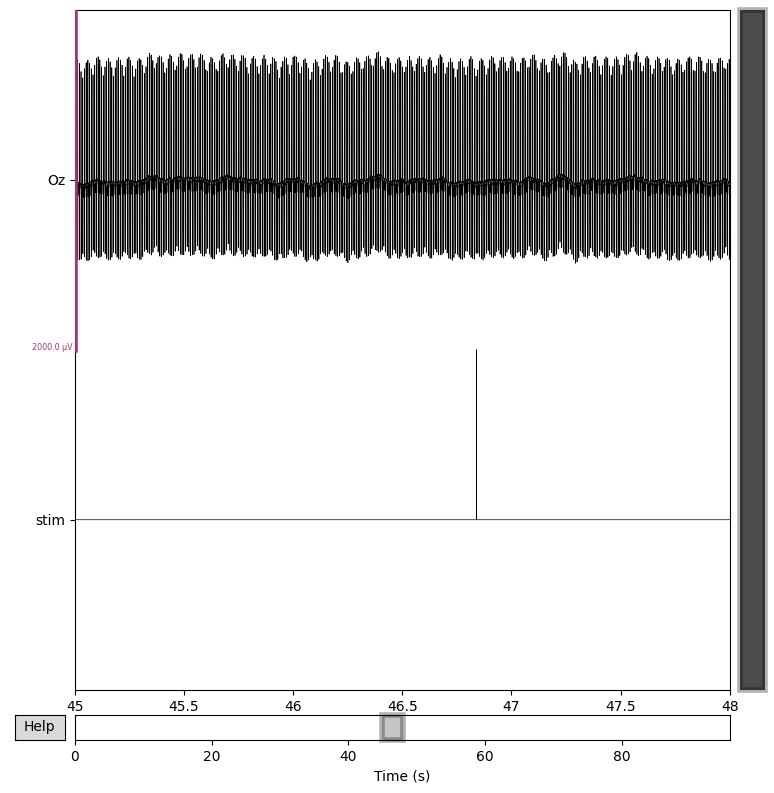

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
21 :


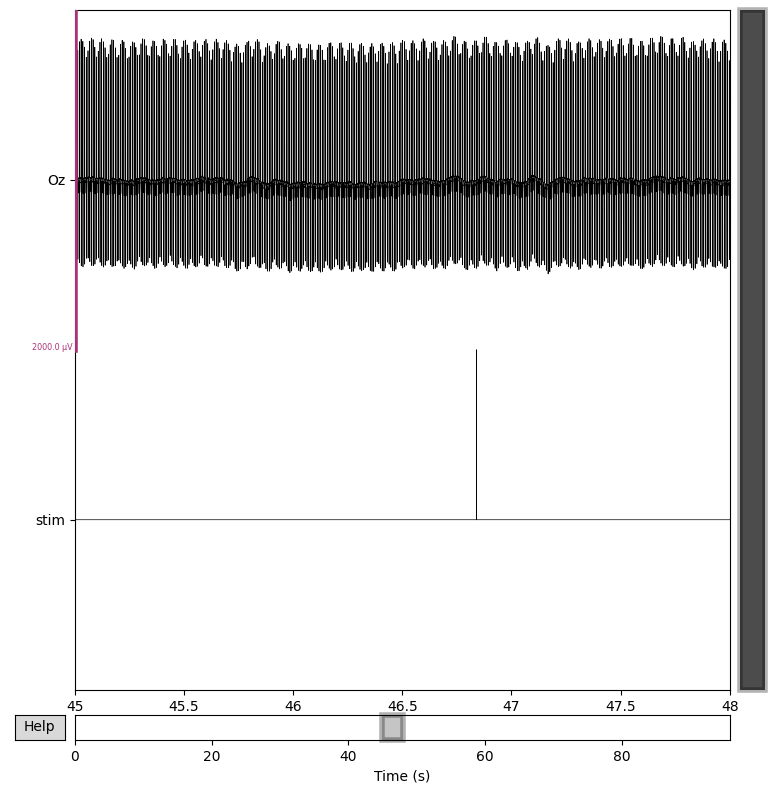

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
22 :


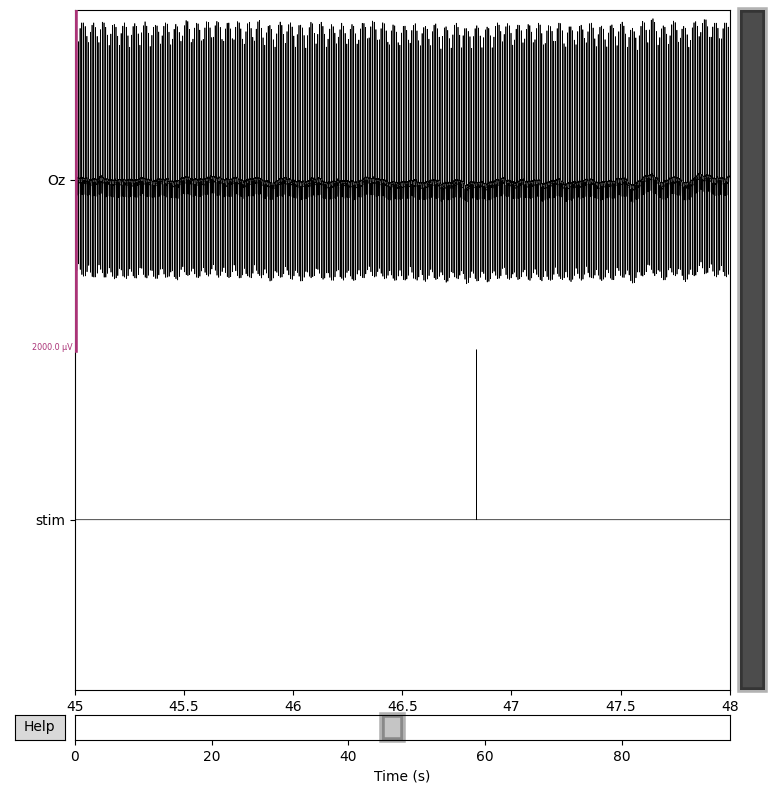

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
23 :


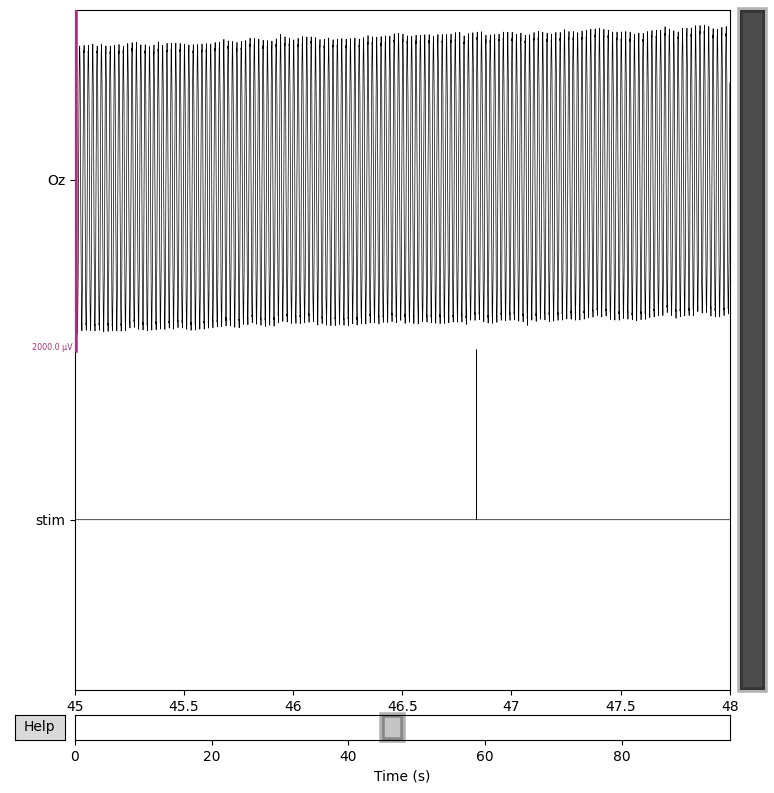

Creating RawArray with float64 data, n_channels=72, n_times=479000
    Range : 0 ... 478999 =      0.000 ...    95.800 secs
Ready.
24 :


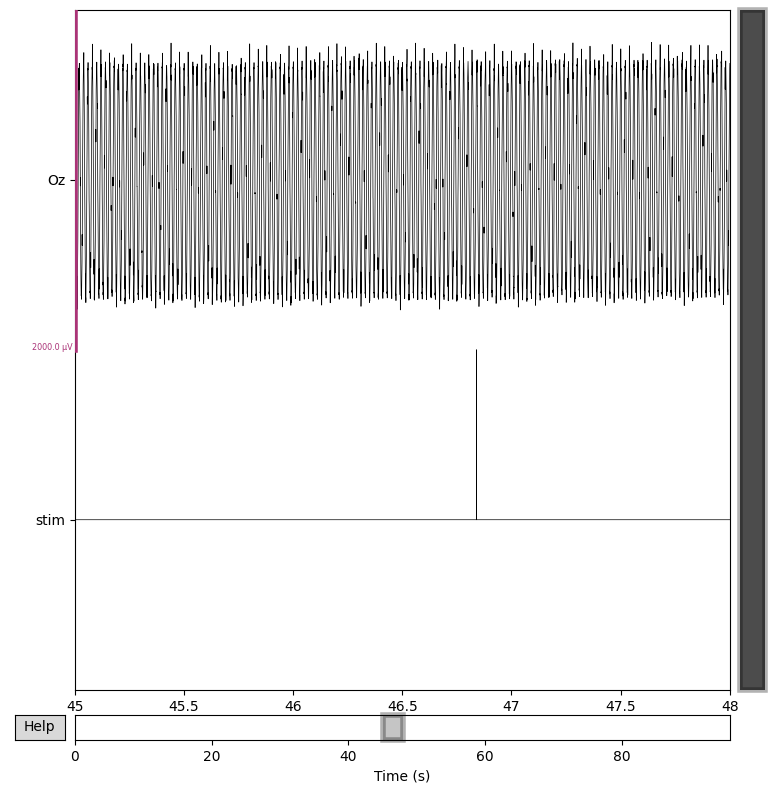

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
25 :


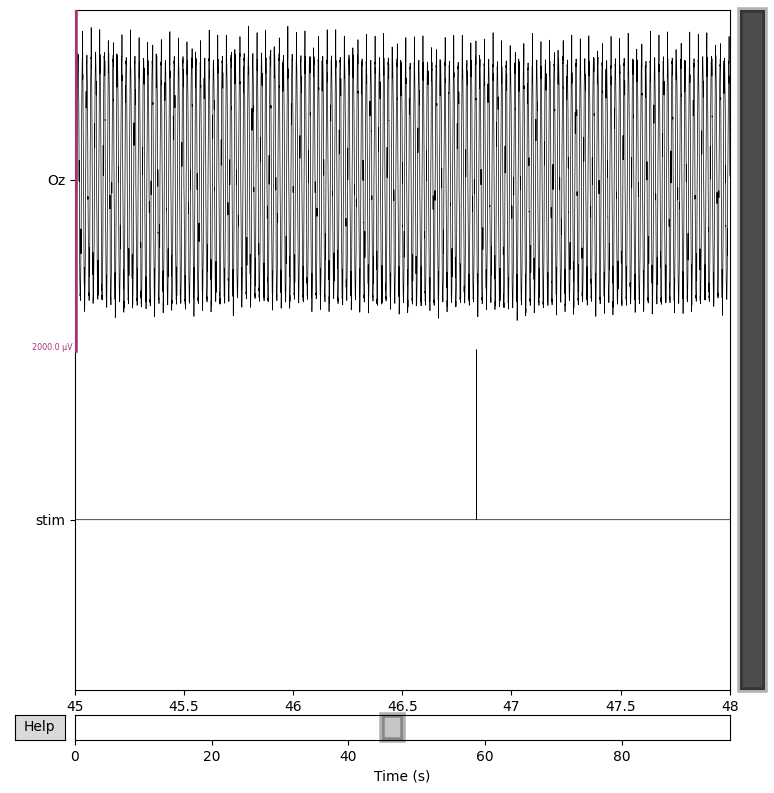

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
26 :


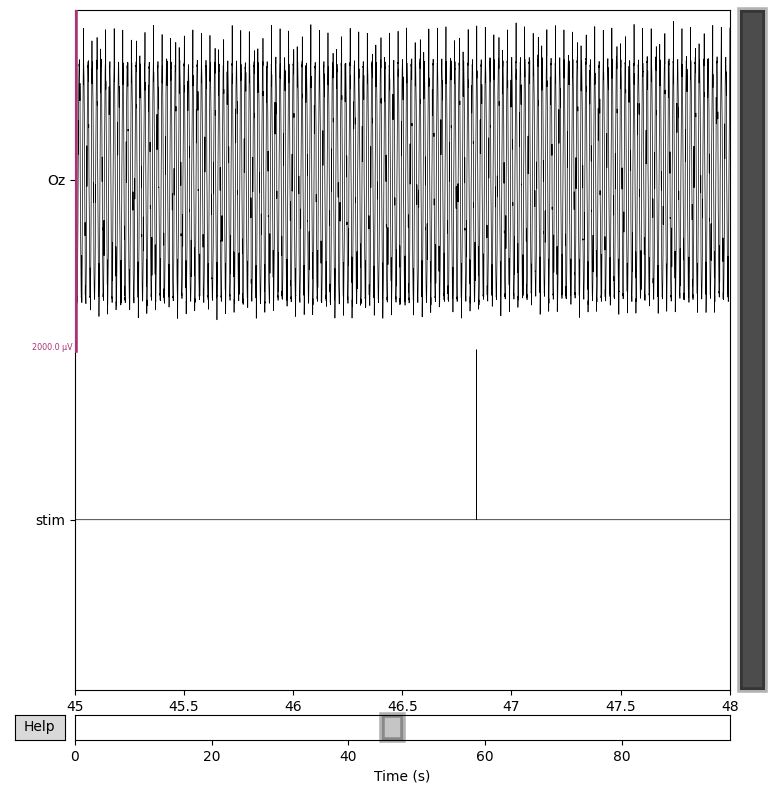

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
27 :


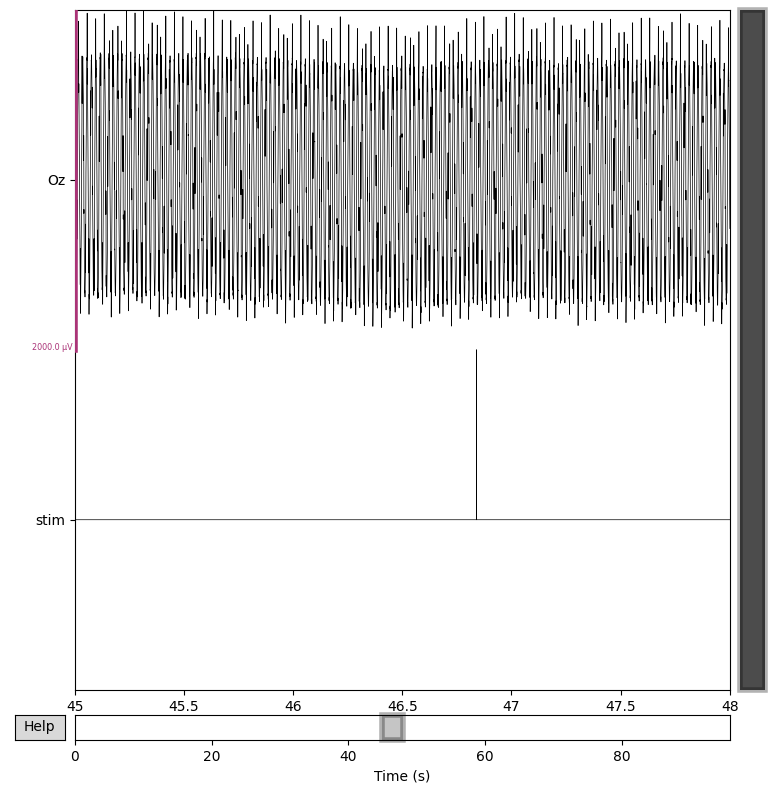

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
28 :


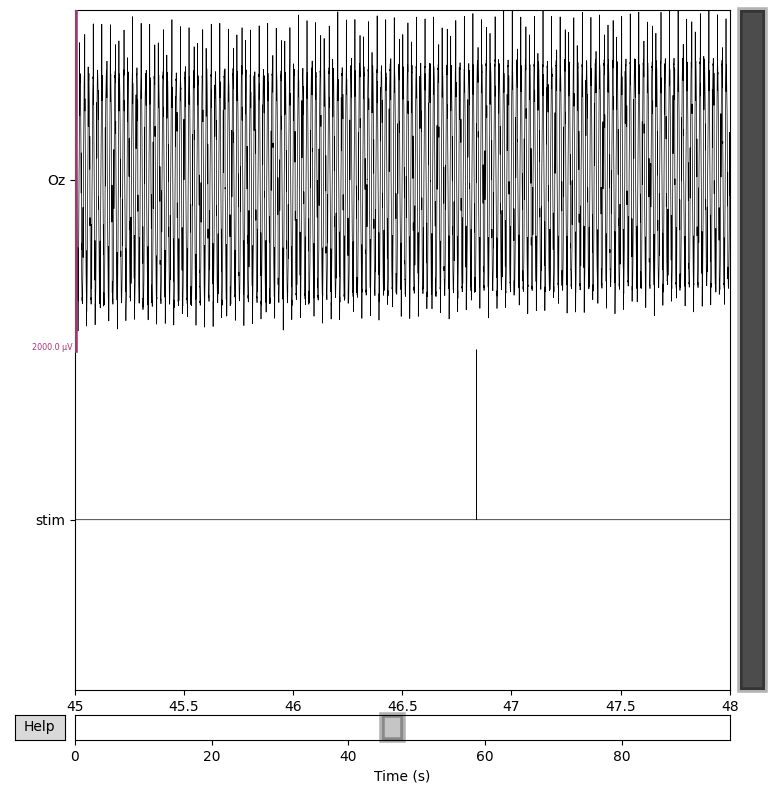

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
29 :


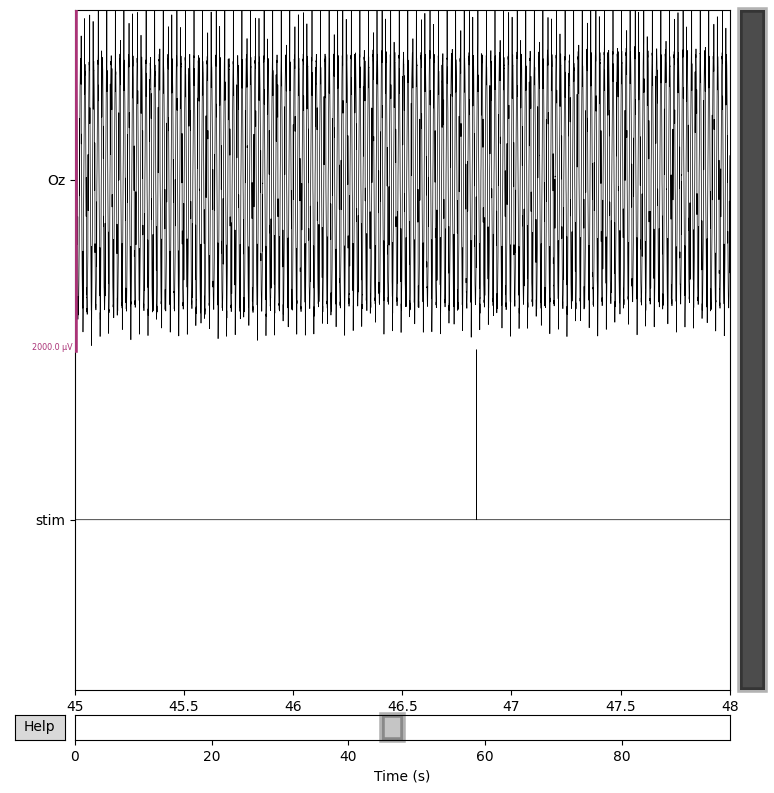

Creating RawArray with float64 data, n_channels=72, n_times=479000
    Range : 0 ... 478999 =      0.000 ...    95.800 secs
Ready.
30 :


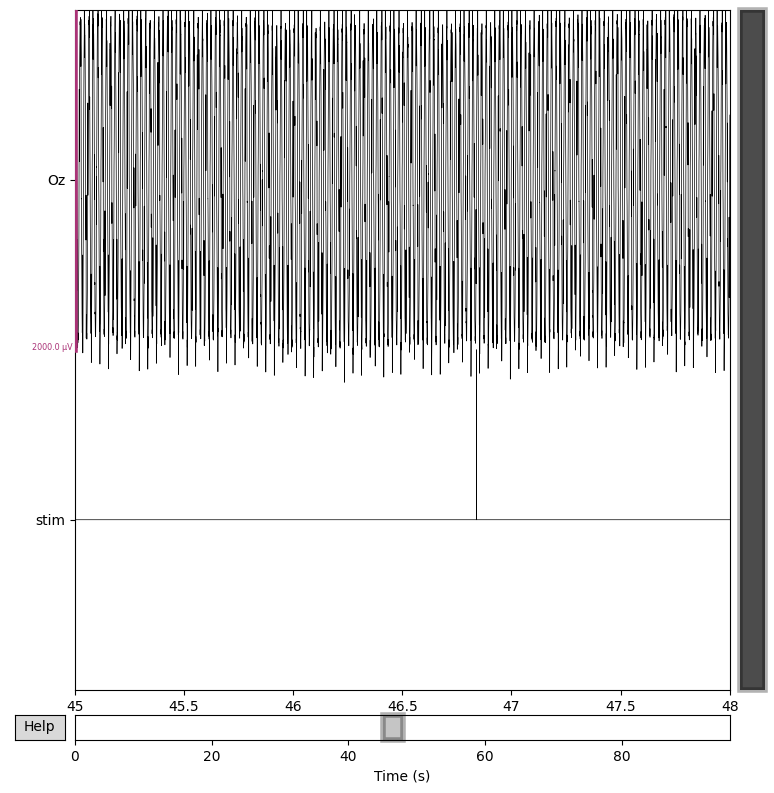

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
31 :


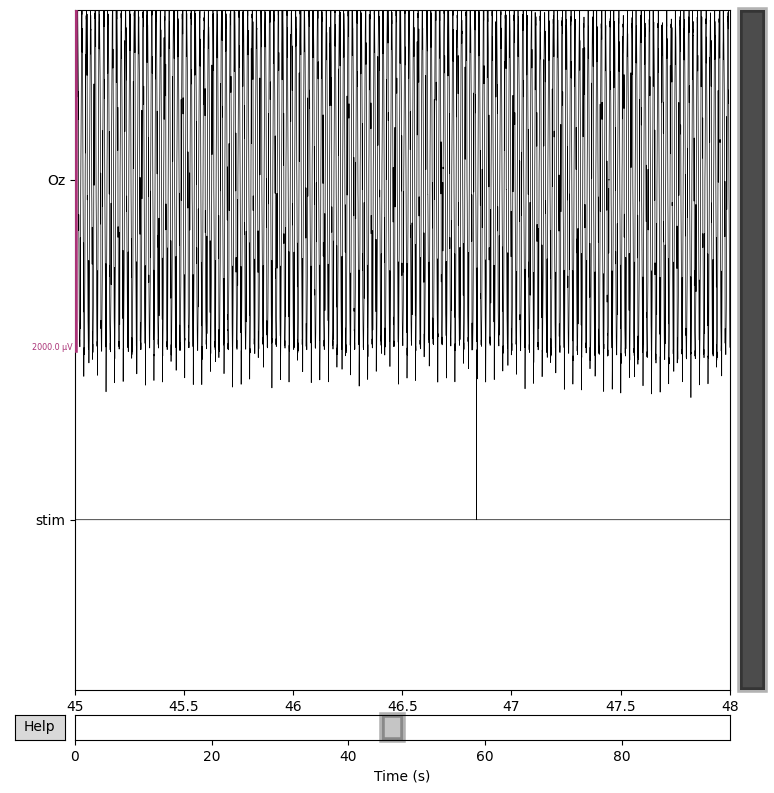

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
32 :


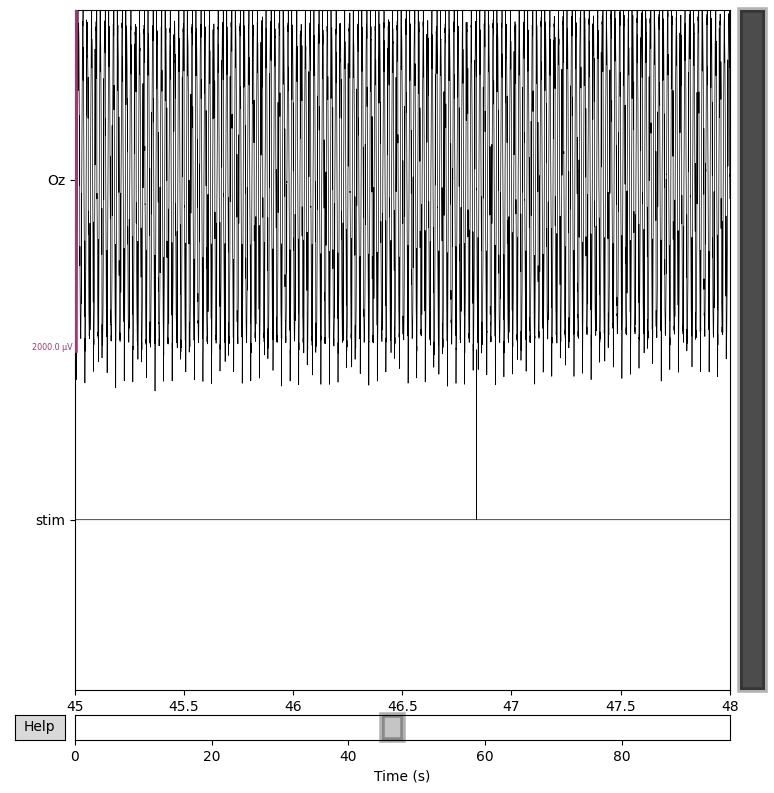

In [35]:
for i in range(33):
    _marker, _df_data=load_to_df(markers, npzs, i)
    _raw=df_to_mne(_marker, _df_data)
    print(i, ":")
    _raw.copy().pick_channels(['stim', 'Oz']).plot(start=45, duration=3, n_channels=2, scalings=1e-3);

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
0 :


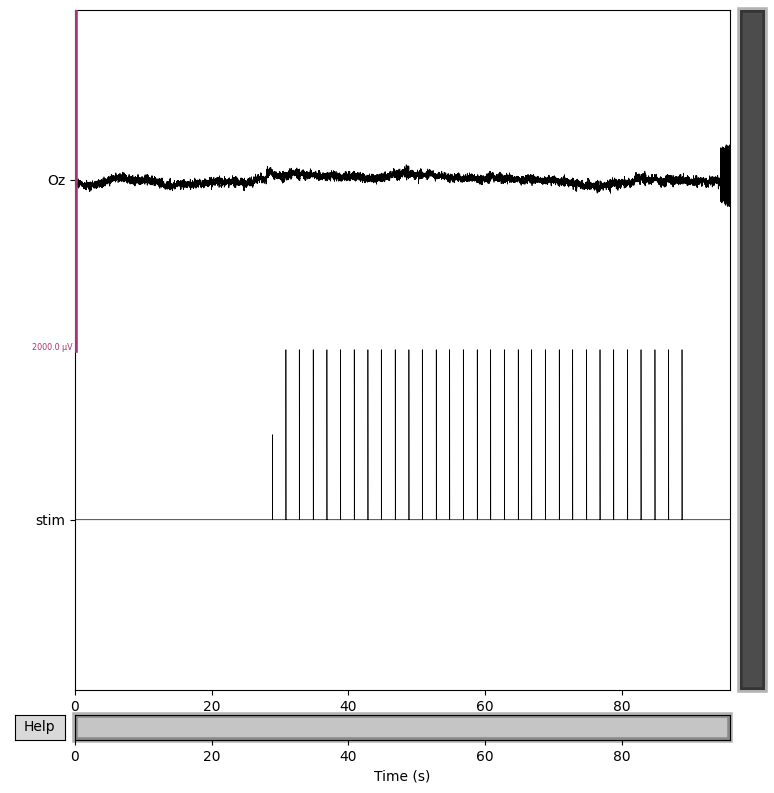

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
1 :


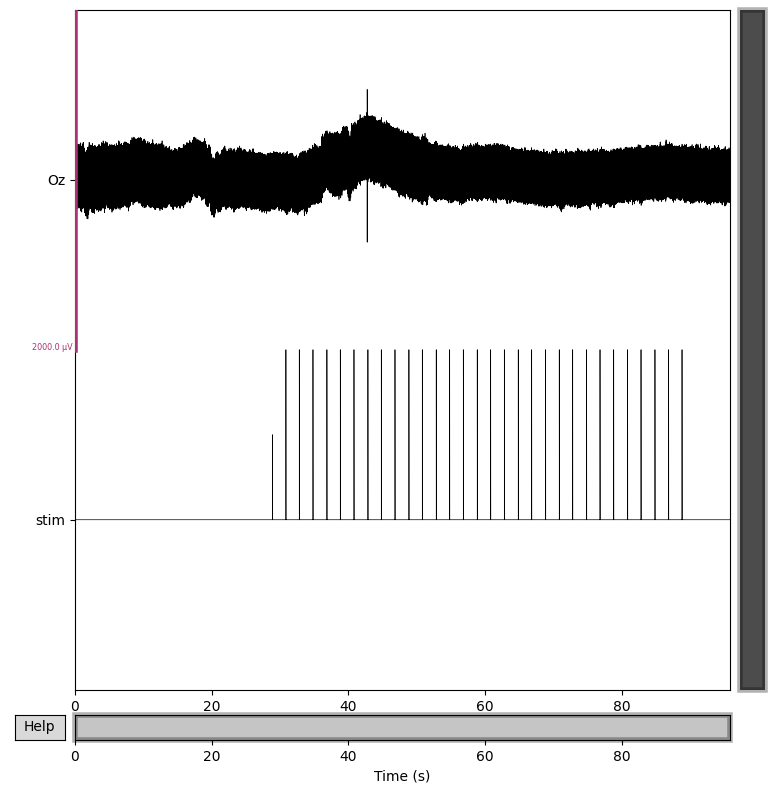

Creating RawArray with float64 data, n_channels=72, n_times=479400
    Range : 0 ... 479399 =      0.000 ...    95.880 secs
Ready.
2 :


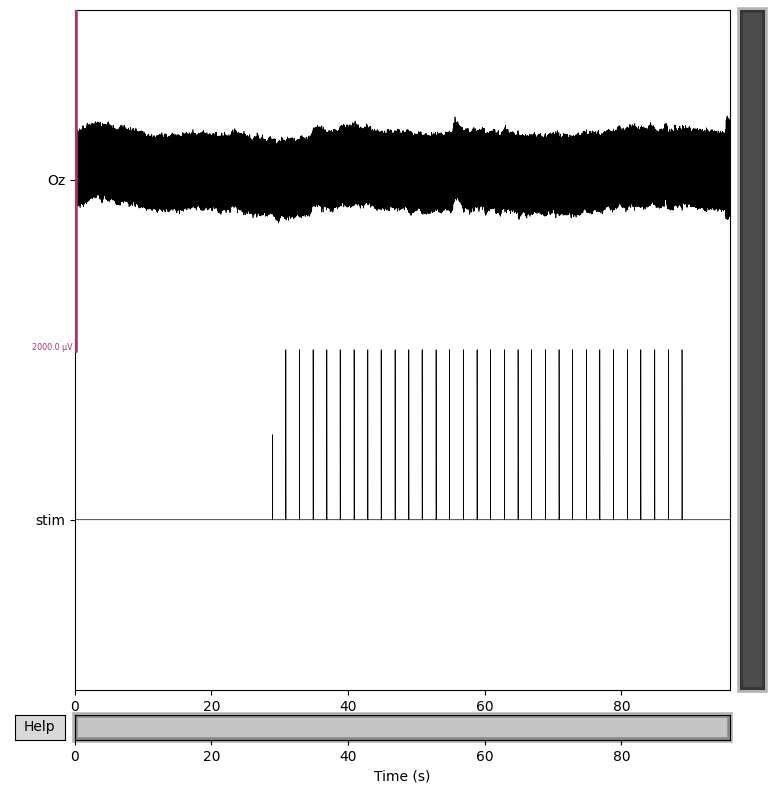

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
3 :


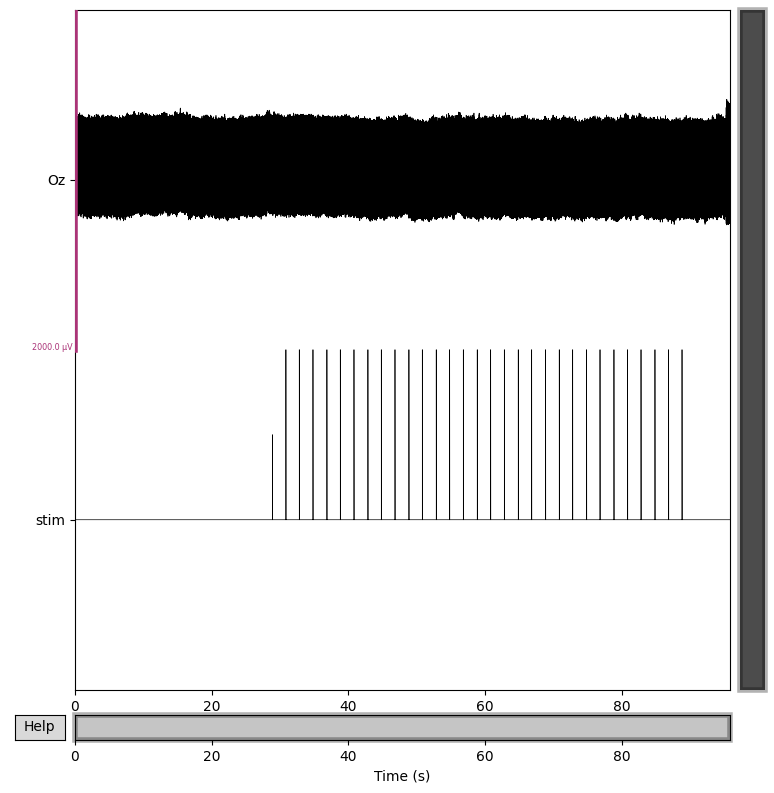

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
4 :


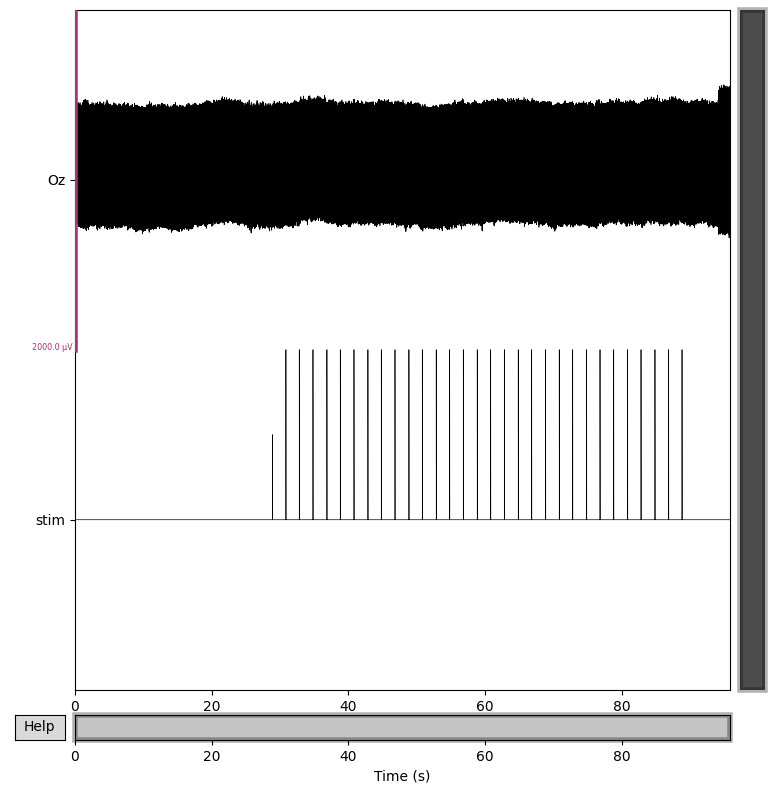

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
5 :


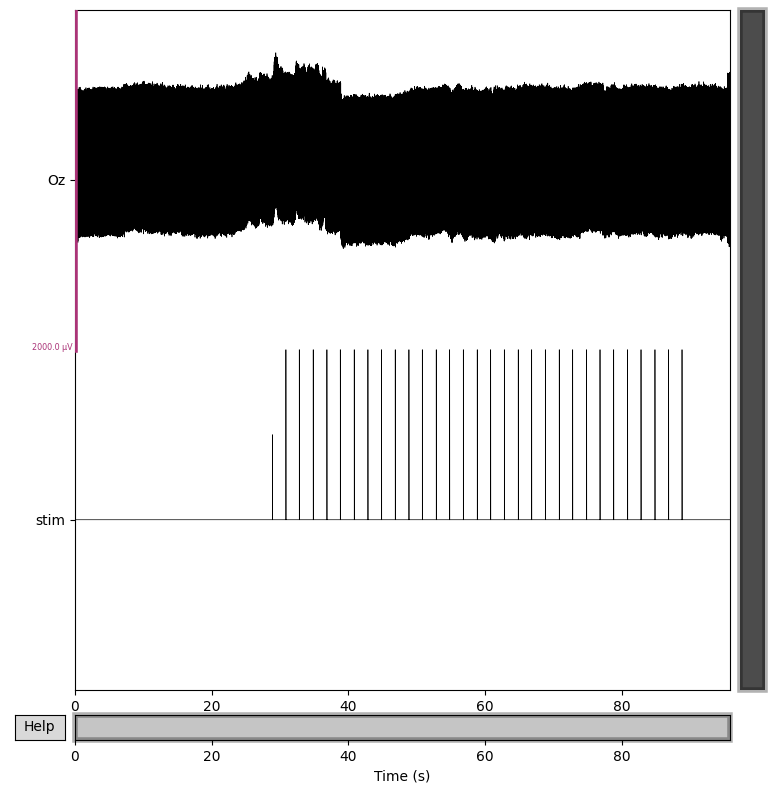

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
6 :


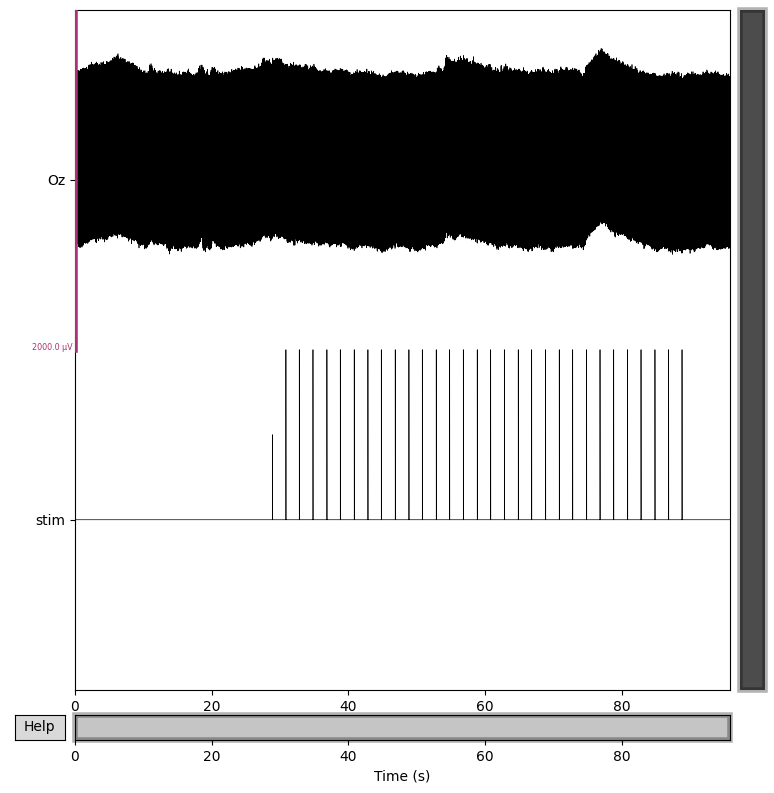

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
7 :


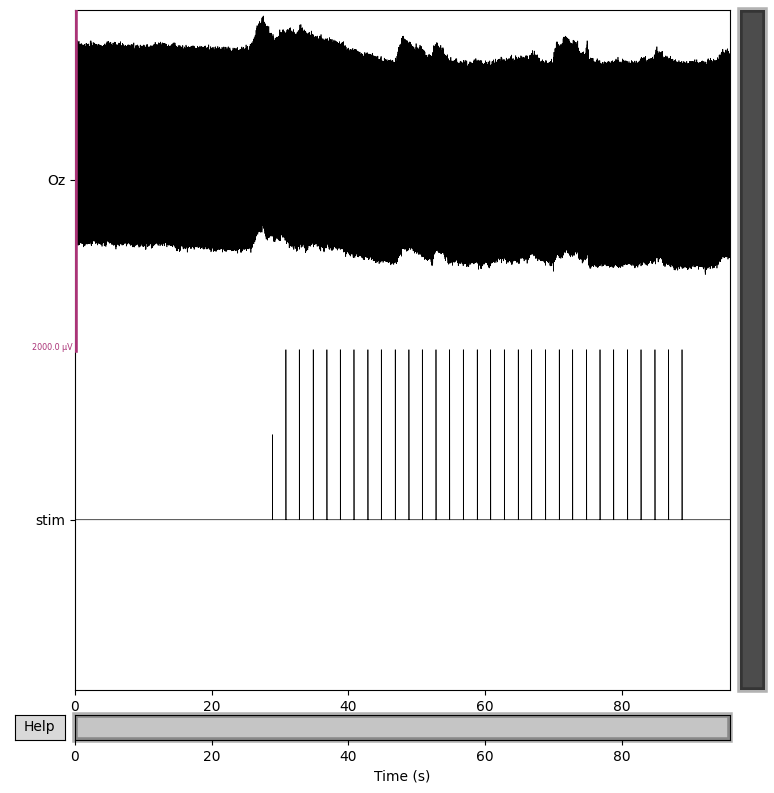

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
8 :


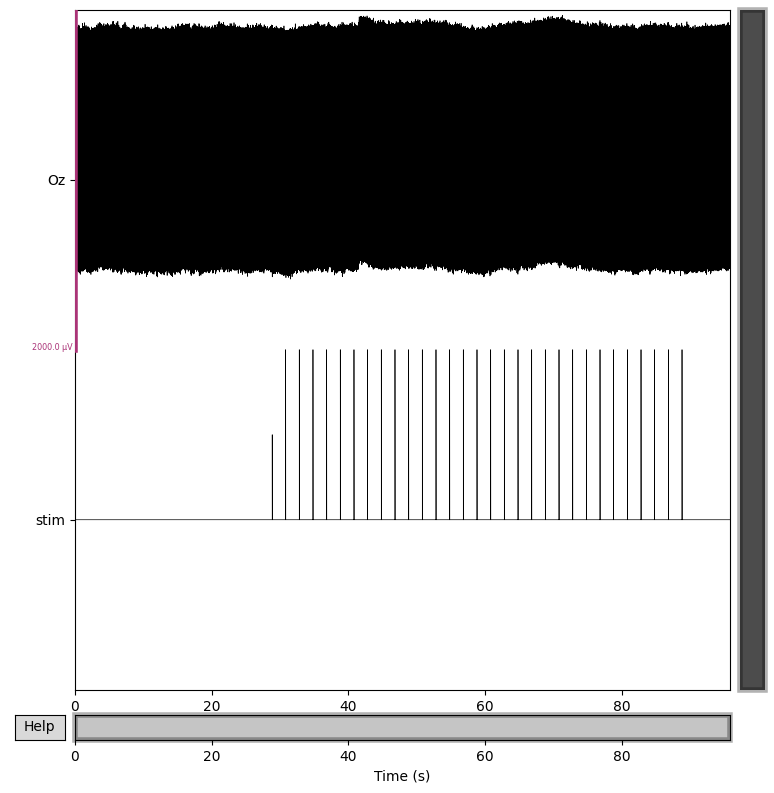

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
9 :


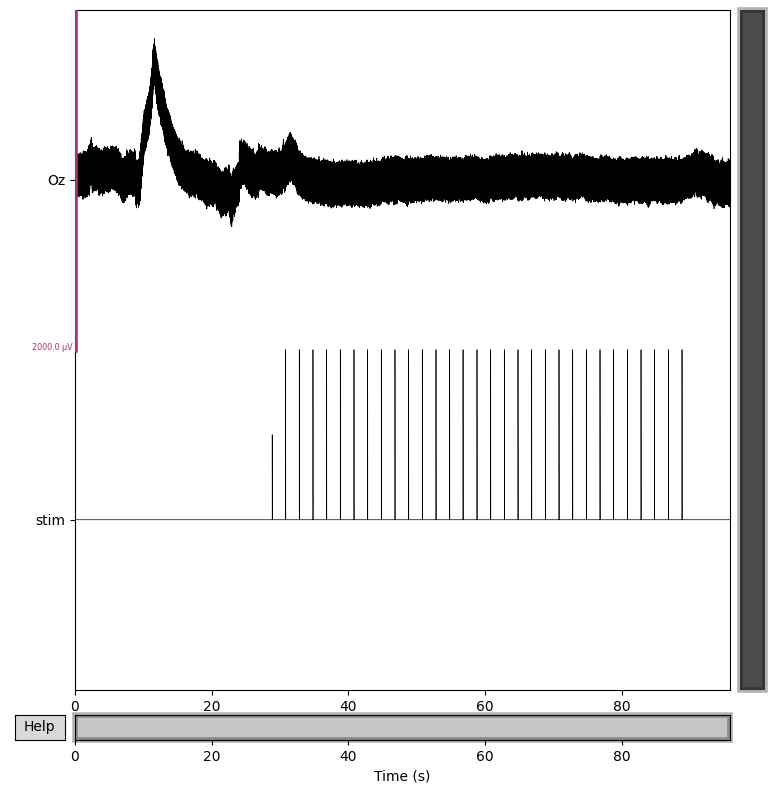

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
10 :


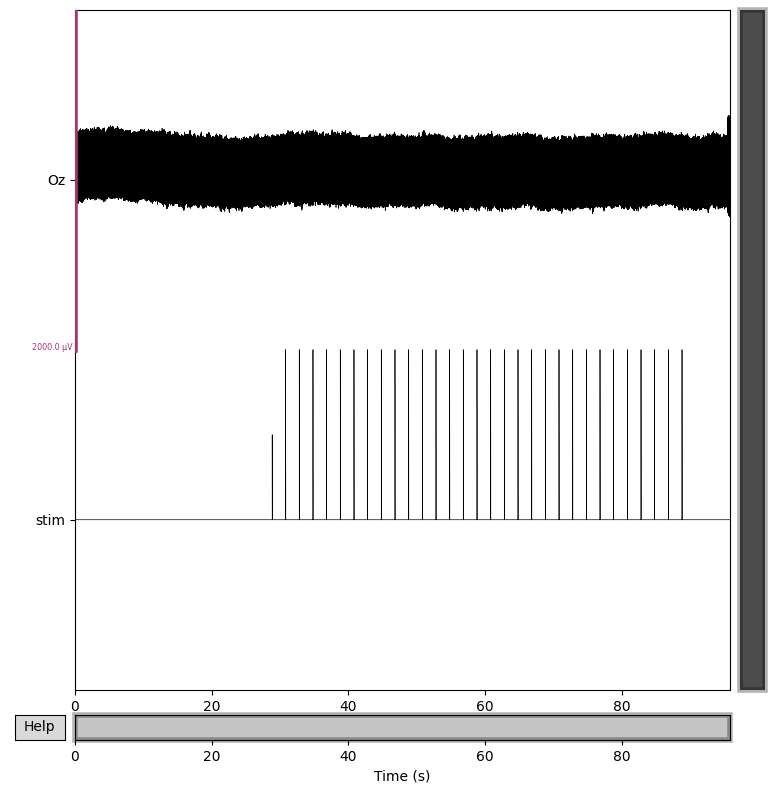

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
11 :


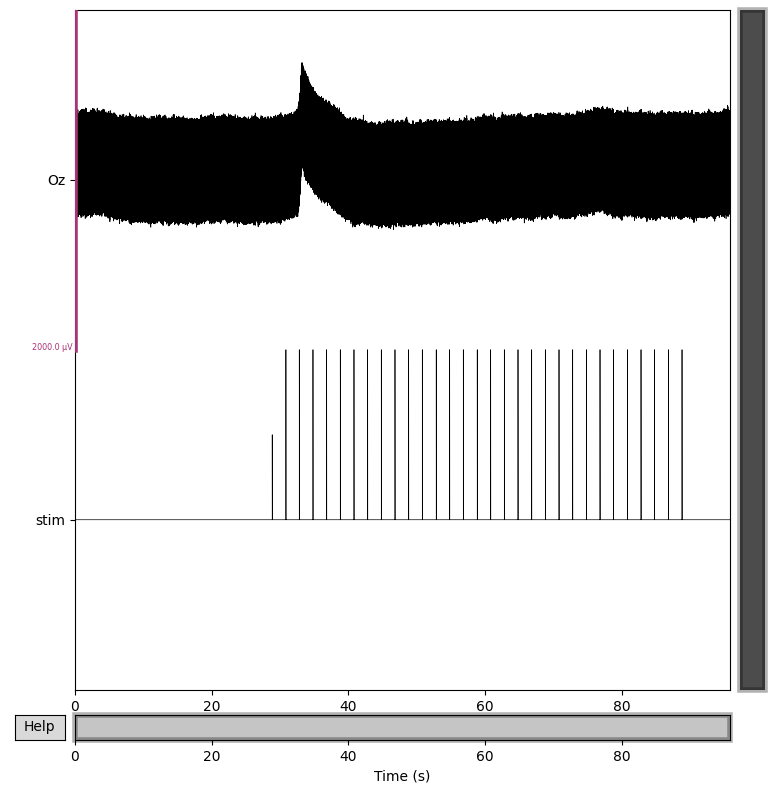

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
12 :


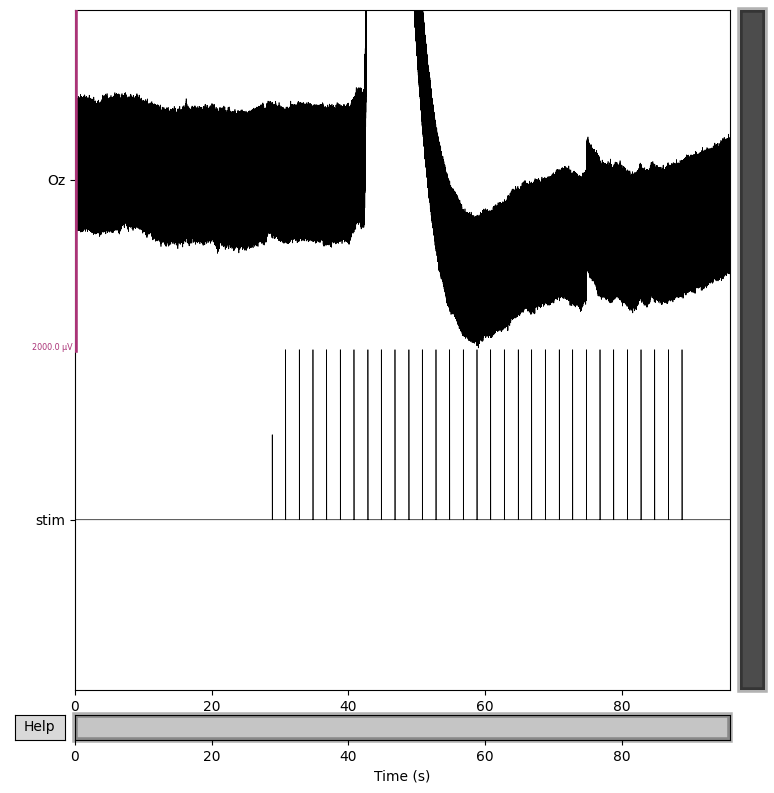

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
13 :


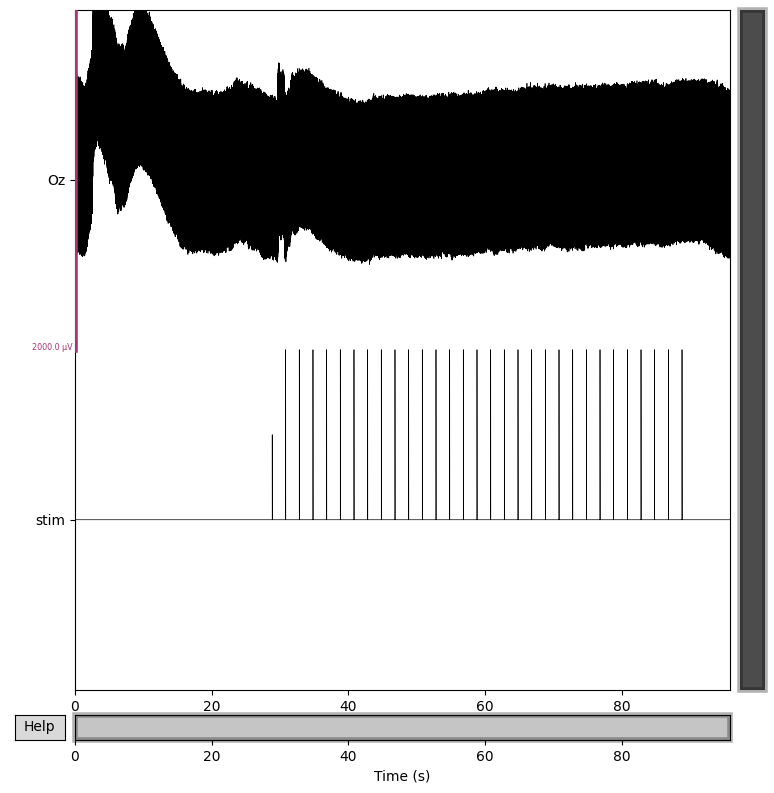

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
14 :


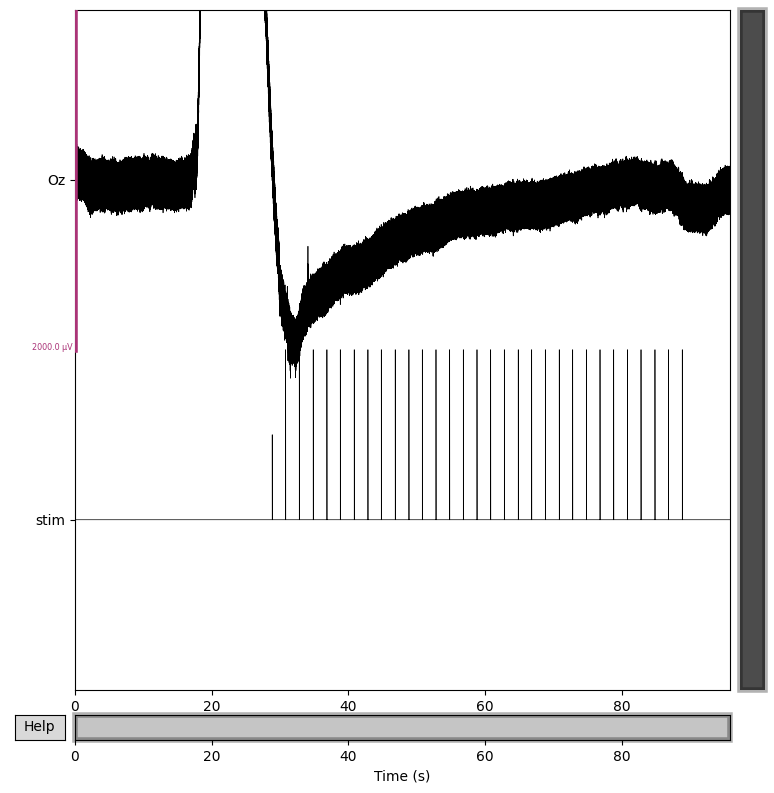

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
15 :


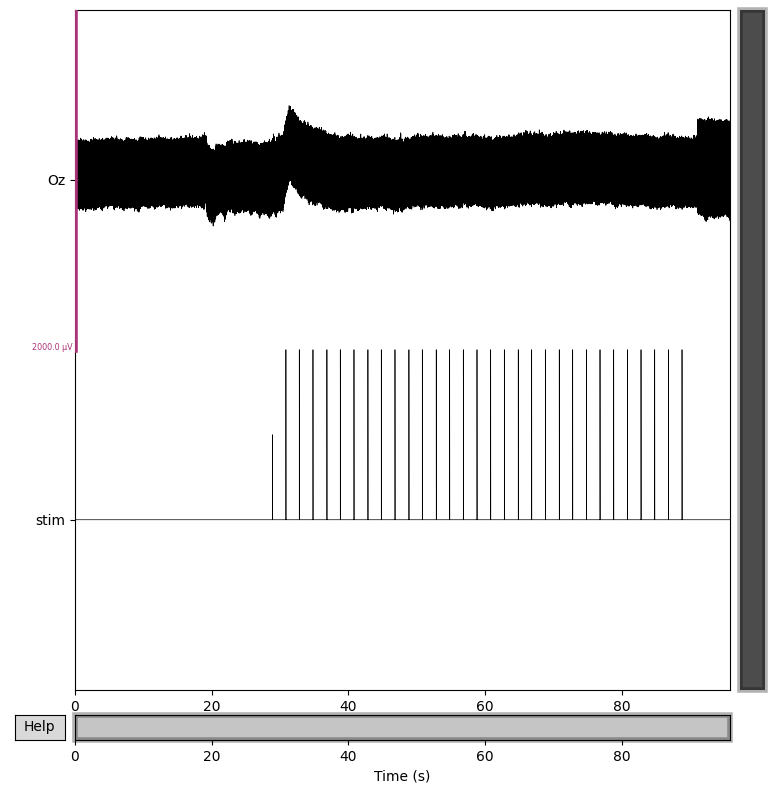

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
16 :


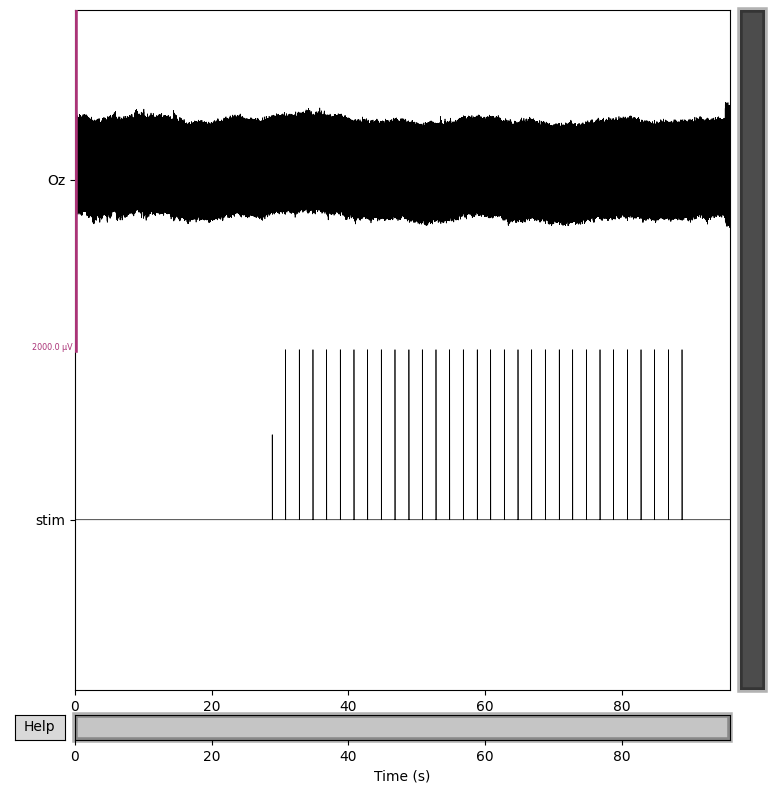

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
17 :


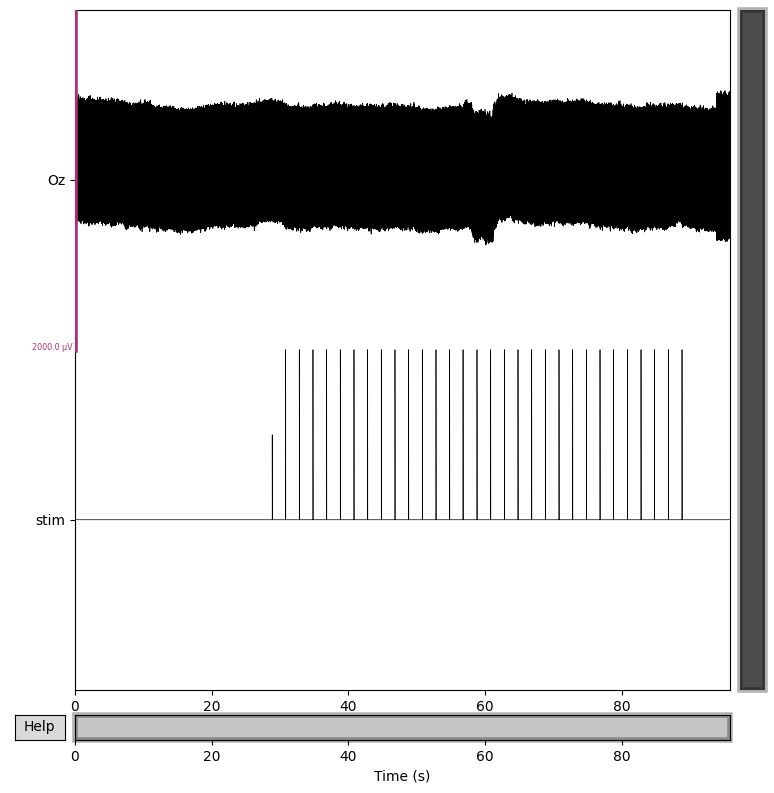

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
18 :


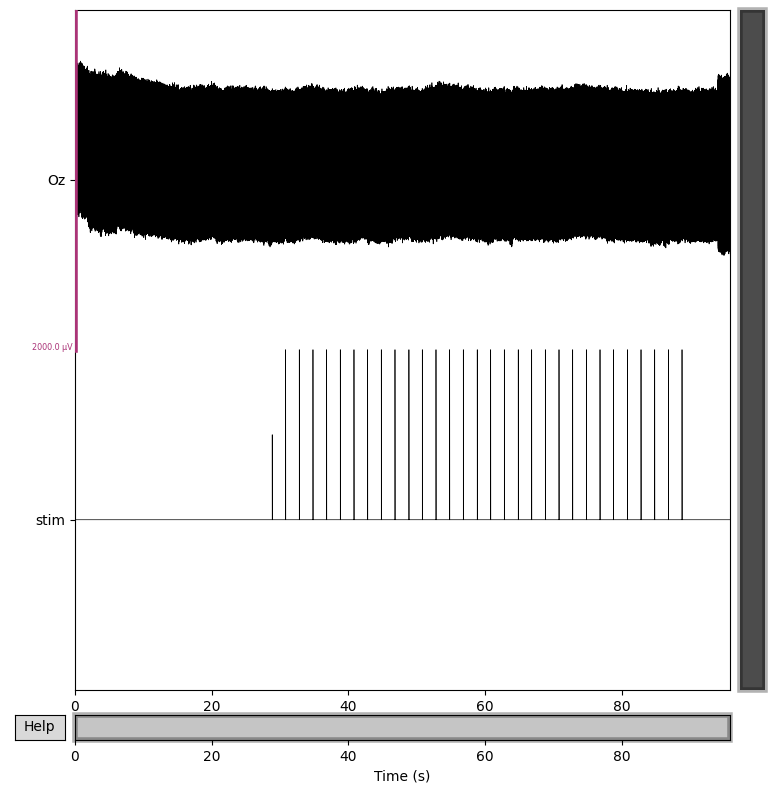

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
19 :


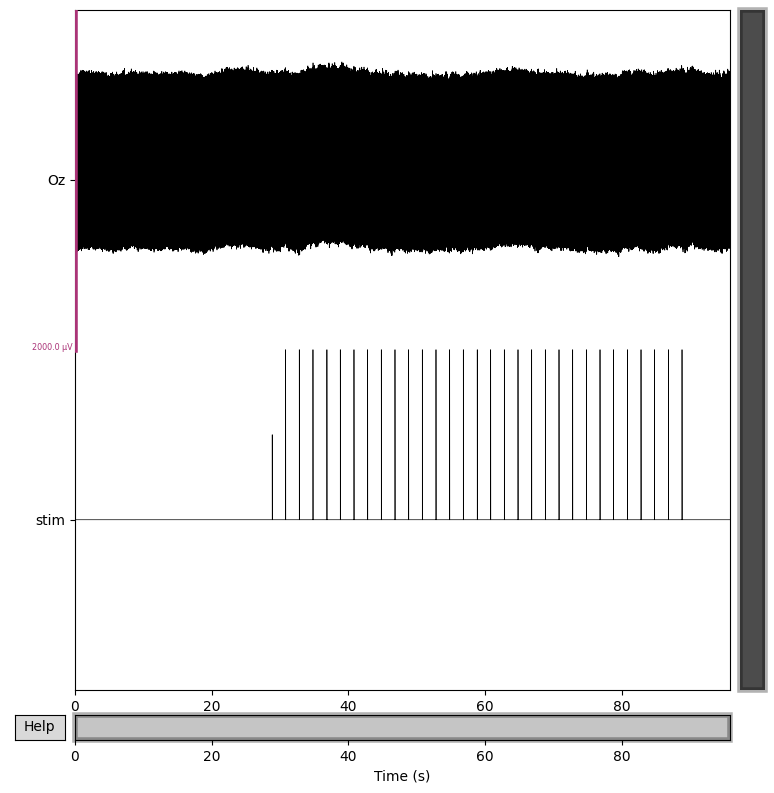

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
20 :


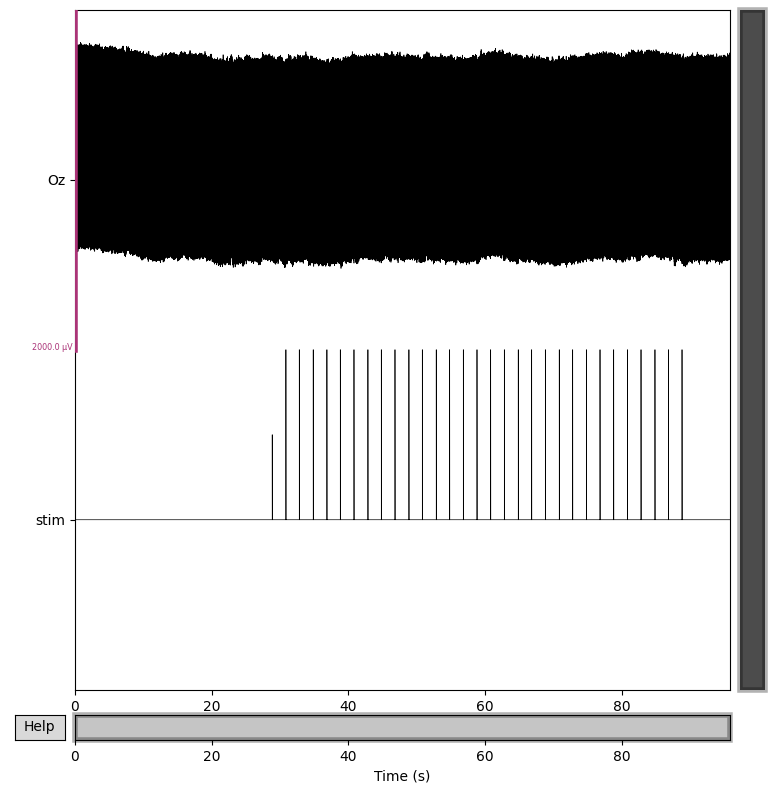

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
21 :


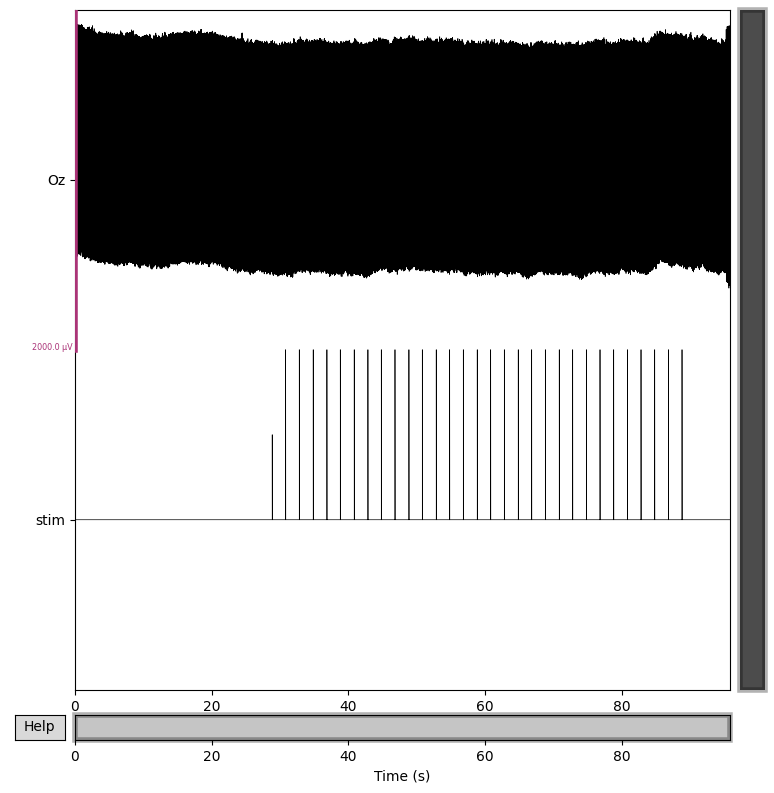

Creating RawArray with float64 data, n_channels=72, n_times=479200
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
22 :


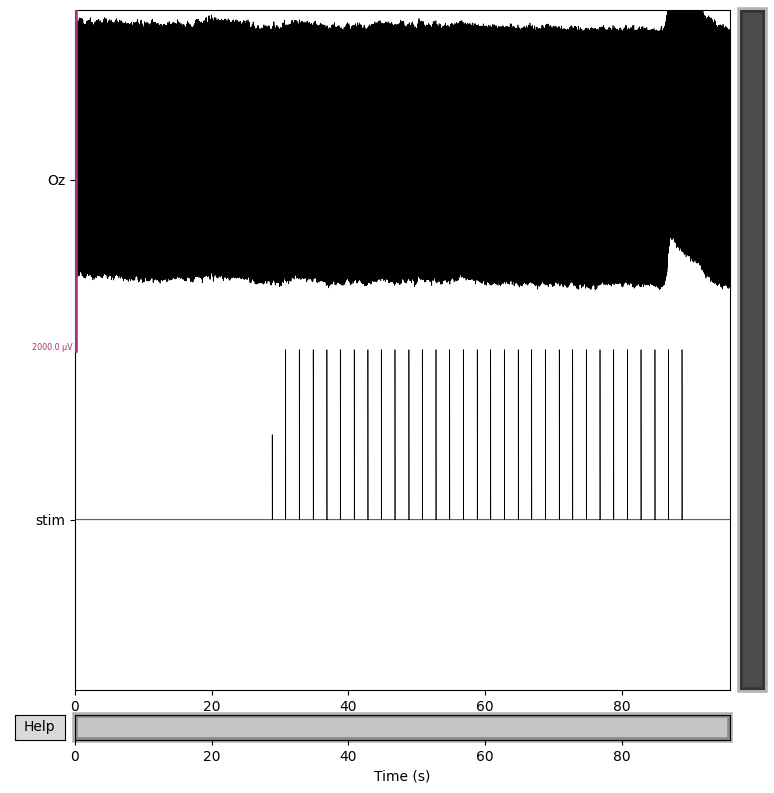

In [36]:
for i in range(23):
    _marker, _df_data=load_to_df(markers, npzs, i)
    _raw=df_to_mne(_marker, _df_data)
    print(i, ":")
    _raw.copy().pick_channels(['stim', 'Oz']).plot(start=0, duration=_raw.times[-1], n_channels=2, scalings=1e-3);

[]

In [37]:
from pactools import simulate_pac, raw_to_mask, Comodulogram, MaskIterator

ModuleNotFoundError: No module named 'pactools'

In [ ]:
i=0
_marker, _df_data=load_to_df(markers, npzs, i)
_raw=df_to_mne(_marker, _df_data)
print(i, ":")
# _raw.copy().pick_channels(['stim', 'Oz']).plot(start=0, duration=_raw.times[-1], n_channels=2, scalings=1e-3);

In [ ]:
n_events = 100
mu = 1.  # mean onset of PAC in seconds
sigma = 0.25  # standard deviation of onset of PAC in seconds
trial_len = 2.  # len of the simulated trial in seconds
first_samp = 5  # seconds before the first sample and after the last

fs = 200.  # Hz
high_fq = 50.0  # Hz
low_fq = 3.0  # Hz
low_fq_width = 2.0  # Hz

n_points = int(trial_len * fs)
noise_level = 0.4


def gaussian1d(array, mu, sigma):
    return np.exp(-0.5 * ((array - mu) / sigma) ** 2)


Let's plot the signal and its power spectral density to visualize the data.
As shown in the plots below, there is a peak for the driver frequency at
3 Hz and a peak for the carrier frequency at 50 Hz but phase-amplitude
coupling cannot be seen in the evoked plot by eye because the signal is
averaged over different phases for each epoch.



Effective window size : 0.410 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


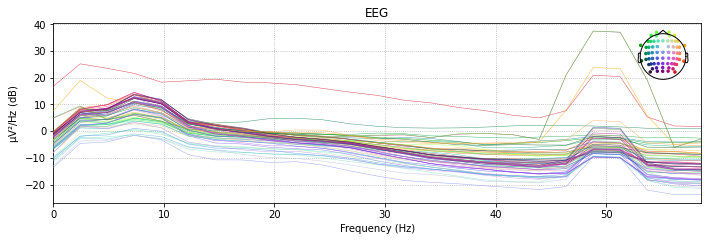

Not setting metadata
31 matching events found
Setting baseline interval to [-3.0, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated


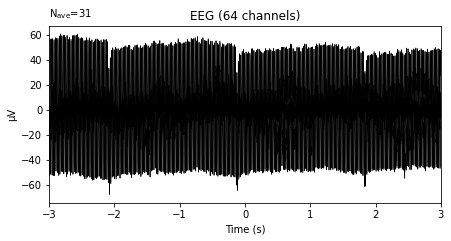

In [178]:
_raw.plot_psd(fmax=60)
epochs = mne.Epochs(_raw, events, tmin=-3, tmax=3)
# epochs = mne.make_fixed_length_epochs(_raw)
epochs.average().plot();

Let's save the raw object out for input/output demonstration purposes



In [179]:
root = mne.utils._TempDir()
raw.save(os.path.join(root, 'pac_example-raw.fif'))

Writing /tmp/tmp_mne_tempdir_2vppj1i2/pac_example-raw.fif
Closing /tmp/tmp_mne_tempdir_2vppj1i2/pac_example-raw.fif
[done]


Here we define how to build the epochs: which channels will be selected, and
on which time window around each event.



In [180]:
raw = mne.io.Raw(os.path.join(root, 'pac_example-raw.fif'))
events = mne.find_events(raw)

# select the time interval around the events
tmin, tmax = mu - 3 * sigma, mu + 3 * sigma
# select the channels (phase_channel, amplitude_channel)
ixs = (0, 0)

Opening raw data file /tmp/tmp_mne_tempdir_2vppj1i2/pac_example-raw.fif...
    Range : 0 ... 479199 =      0.000 ...    95.840 secs
Ready.
31 events found
Event IDs: [1 2]


In [61]:
events = mne.find_events(raw)
raw.add_events(events)

31 events found
Event IDs: [ 8 16]


In [62]:
raw.info['events']

[]

Then, we create the inputs with the function raw_to_mask, which creates the
input arrays and the mask arrays. These arrays are then given to a
comodulogram instance with the `fit` method, and the `plot` method draws the
results.



In [181]:
# create the input array for Comodulogram.fit

low_sig, high_sig, mask = raw_to_mask(raw, ixs=ixs, events=events, tmin=tmin,
                                      tmax=tmax)

The mask is an iterable which goes over the _unique_ events in the event
array (if it is 3D). PAC is estimated where the `mask` is `False`.
Alternatively, we could also compute the `MaskIterator` object directly.
This is useful if you want to compute PAC on other kinds of time series,
for example source time courses.



[........................................] 100% | 4.03 sec | comodulogram: DAR(10, 1) 


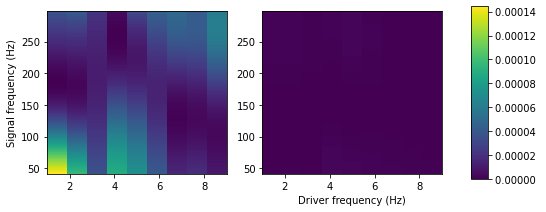

In [187]:
low_sig, high_sig = raw[ixs[0], :][0], raw[ixs[1], :][0]
mask = MaskIterator(events, tmin, tmax, raw.n_times, raw.info['sfreq'])

# create the instance of Comodulogram
estimator = Comodulogram(fs=raw.info['sfreq'],
                         low_fq_range=np.arange(1,10), low_fq_width=2.,
                         high_fq_range=np.arange(41,300), high_fq_width=0.5,
                         method='duprelatour', progress_bar=True)
# compute the comodulogram
estimator.fit(low_sig, high_sig, mask)
# plot the results
estimator.plot(tight_layout=False)
plt.show()